# Programming for Data Analysis Assignment 1 Notebook

Author - Sean Humphreys

---

## Contents

1. [Introduction](#introduction)
2. [Software Libraries](#software-libraries)
3. [Dataset Exploration](#dataset-exploration)
4. [Dataset Variables](#dataset-variables)
5. [Variable Relationships](#variable-relationships)
    1. [Correlation](#correlation)
    2. [Wind and Gust Speed](#wind-and-gust-speed)
    3. [Temperature](#temperature)
    4. [Humidity](#humidity-variable)
    5. [Time - Seasons](#time---seasons)
5. [Random Probability Distribution](#random-probability-distribution)
    1. [Wind Speed](#wind-speed)
    2. [Gust Speed](#gust-speed)
    3. [Humidity](#humidity)
    4. [Average Wind Chill](#average-wind-chill)
    5. [Wind Chill Minimum](#wind-chill-minimum)
    6. [Average Daily Temperature](#average-daily-temperature)
    7. [Daily Temperature Low](#daily-temperature-low)
    8. [Daily Temperature High](#daily-temperature-high)
    9. [Air Pressure](#air-pressure)
6. [Synthesised Dataset](#synthesised-dataset)
7. [Correlation ](#correlation)
8. [Conclusions](#conclusions)
4. [References](#references)
5. [Associated Reading](#associated-reading)

---

## Introduction <a id="introduction"></a>

Weather, to a great extent, determines humans and other living beings way of life. Weather patterns and extreme weather events affect areas as diverse as the clothes we wear, the migratory patterns of birds (Cooper et al., 2023), agriculture (e.g., Wheeler et al. 2000; Asseng et al. 2011) and health (Pascual et al. 2006; Kjellstrom et al. 2009). To be able to manage the effects of climate change the ability to accurately model weather systems is of growing importance. In terms of energy security, the ability to map wind patterns is of crucial importance when it comes to wind power generation.

The dataset explored and synthesised in this notebook is from a weather sensor in the author's back garden. The data extract is in the form of a csv. The source data csv can be accessed [here](datasets/back_garden_sensor_data_12_months.csv). The extract contains local weather data captured over a 357 day period.

Each variable in the dataset is visualised, assessed for probability distribution fit and subsequently modelled.

---

## Software Libraries <a id="software-libraries"></a>

The following software libraries are used in this notebook:

- [Matplotlib](https://matplotlib.org/) (https://matplotlib.org/ - last accessed 8 Nov. 2023) - is an open-source software library for creating static, animated, and interactive visualizations in Python.

- [Numpy](https://numpy.org/doc/stable/index.html) (https://numpy.org/doc/stable/index.html - last accessed 8. Nov 2023) - is an open-source software library for the Python, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. 

- [Pandas](https://pandas.pydata.org/) (https://pandas.pydata.org/ - last accessed 3 Nov. 2023) is an open-source software library used in data analytics that allows data analysis and manipulation. Pandas is built on top of the *Python* programming language. A Pandas DataFrame is a dictionary like container for Series objects. A DataFrame is the primary Pandas data structure.

- [Pathlib](https://docs.python.org/3/library/pathlib.html) (https://docs.python.org/3/library/pathlib.html - last accessed 23 Nov. 2023) -  a python module that offers classes representing filesystem paths with semantics appropriate for different operating systems.

- [SciPy](https://scipy.org/) (https://scipy.org/ - last accessed 21 Nov. 2023) provides algorithms for scientific computing in Python. SciPy is a portmanteau of Scientific Python. It is a scientific computation library that uses Numpy underneath.

- [Seaborn](https://seaborn.pydata.org/) (https://seaborn.pydata.org/ - last accessed 23 Nov. 2023) - is visualisation software that is built on matplotlib. It offers a high-level interface for drawing attractive and informative statistical graphics.

- [scikit-learn](https://scikit-learn.org/stable/index.html) (https://scikit-learn.org/stable/index.html) - are a set of tools used for predictive analysis. It is used extensively in machine learning and predictive analysis.

In [1]:
# import the required software libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import sklearn
from pathlib import Path

---

## Dataset Exploration <a id="dataset-exploration"></a>

The Pandas software library is used to clean and process datasets. The dataset csv file is read into Pandas as a Pandas DataFrame.

In [2]:
# use pandas to read in the dataset
garden_weather = pd.read_csv('datasets/back_garden_sensor_data_12_months.csv')

The first and last 5 rows of the DataFrame are inspected to ascertain if there is any obvious data quality issues. This is achieved using the Pandas `head()` and `tail()` methods.

In [3]:
# https://www.analyticsvidhya.com/blog/2023/07/head-and-tail-functions/ - [Accessed 7 Nov. 2023]
garden_weather.head()

Date Time  Wind Speed m/s  Gust m/s  Humidity %  Chill Celsius  \
0  09/11/2022 00:00             3.3       6.7        84.0           12.9   
1  10/11/2022 00:00             3.2      11.5        81.0           16.9   
2  11/11/2022 00:00             3.1      12.5        82.0           16.9   
3  12/11/2022 00:00             0.6       2.3        87.0           13.6   
4  13/11/2022 00:00             0.8       5.5        87.0           14.8   

   Chill Minimum Celsius  Temperature Average Celsius  \
0                   11.8                        12.74   
1                   12.1                        14.59   
2                   14.4                        15.40   
3                   12.6                        13.27   
4                   12.3                        13.95   

   Temperature Range (low) Celsius  Temperature Range (high)  Celsius  
0                             12.4                               13.0  
1                             12.3                               16.9  
2                             14.4                               16.9  
3                             12.6                               13.6  
4                             12.3                               14.8

In [4]:
# https://www.analyticsvidhya.com/blog/2023/07/head-and-tail-functions/ - [Accessed 7 Nov. 2023]
garden_weather.tail()

Date Time  Wind Speed m/s  Gust m/s  Humidity %  Chill Celsius  \
352  27/10/2023 00:00             0.2       1.5        91.0           16.8   
353  28/10/2023 00:00             0.5       2.2        91.0           17.0   
354  29/10/2023 00:00             1.3       4.9        92.0           13.4   
355  30/10/2023 00:00             0.1       0.6        93.0           13.9   
356  31/10/2023 00:00             0.6       2.5        93.0           15.9   

     Chill Minimum Celsius  Temperature Average Celsius  \
352                    5.0                         9.58   
353                    6.7                        10.32   
354                    3.6                         8.36   
355                    4.7                         8.94   
356                    5.5                         9.91   

     Temperature Range (low) Celsius  Temperature Range (high)  Celsius  
352                              5.0                               16.8  
353                              6.7                               17.0  
354                              3.6                               13.4  
355                              4.7                               13.9  
356                              5.5                               15.9

Using Pandas the column names can be renamed to make them python friendly.

In [5]:
# python friendly column names list
column_rename = ['date_time', 'wind_speed_m_s', 'gust_m_s', 'humidity_%', 'chill_celsius', 'chill_minimum_celsius', 
                 'temperature_average_celsius', 'temperature_range_low_celsius', 'temperature_range_high_celsius']

# rename columns - https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/ [Accessed 7 Nov. 2023].
garden_weather.columns = column_rename

The Pandas `info()` method is used to print more information about the DataFrame. The renamed columns are confirmed from the output of this command. The Pandas Dtype (datatype) for each variable is displayed. The range index indicates that there are 357 rows in the dataset.

In [6]:
# Code from https://www.w3schools.com/python/pandas/ref_df_info.asp [Accessed 7 Nov. 2023].
garden_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date_time                       357 non-null    object 
 1   wind_speed_m_s                  356 non-null    float64
 2   gust_m_s                        356 non-null    float64
 3   humidity_%                      356 non-null    float64
 4   chill_celsius                   356 non-null    float64
 5   chill_minimum_celsius           356 non-null    float64
 6   temperature_average_celsius     356 non-null    float64
 7   temperature_range_low_celsius   356 non-null    float64
 8   temperature_range_high_celsius  356 non-null    float64
dtypes: float64(8), object(1)
memory usage: 25.2+ KB


The variables in the *date_time* column are stored as objects. The Pandas object datatype is used to store text or mixed numeric and non-numeric values (Moffitt, 2018). The values in this column are character strings and do not provide any datetime operations (e.g. extract the year, day of the week, etc.). The Pandas `to_datetime()` function can be applied to this data. Pandas interprets the strings and convert these to datetime objects. This allows for examining details during specific time periods of interest, and zooming out to explore variations on different time scales, such as monthly or annual aggregations, recurring patterns, and long-term trends (Walker, 2019).

In [7]:
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html [Accessed 7 Nov. 2023]
garden_weather['time_series'] = pd.to_datetime(garden_weather['date_time'], dayfirst=True, format='%d/%m/%Y %H:%M')

# set time_series column as index
# https://stackoverflow.com/questions/27032052/how-do-i-properly-set-the-datetimeindex-for-a-pandas-datetime-object-in-a-datafr [Accessed 7 Nov. 2023].
garden_weather = garden_weather.set_index('time_series')

The rest of the variables in the dataset are stored as 64bit floating point integers. 64-bit datatypes allow for a high degree of precision. However, use of 64-bit precision comes at a cost of computational overhead as more memory is required to complete calculations on these numbers due to their size.

Of note, there is an issue caused by limitations in the way in which Python performs floating point arithmetic (docs.python.org, n.d.). Floating point numbers are stored in memory as base 2 binary fractions. Most decimal fractions cannot be represented exactly as binary fractions. Thus decimal floating-point numbers are only approximated by the binary floating-point numbers actually stored in the machine. This has the potential to cause inaccuracies when arithmetic is performed on floating point numbers in Python and could lead to inaccuracies when modelling data.

After re-indexing the DataFrame a visual check can be made to validate the changes. 

In [8]:
# quick visual validation of the changes to the DataFrame
garden_weather.head()

date_time  wind_speed_m_s  gust_m_s  humidity_%  \
time_series                                                           
2022-11-09   09/11/2022 00:00             3.3       6.7        84.0   
2022-11-10   10/11/2022 00:00             3.2      11.5        81.0   
2022-11-11   11/11/2022 00:00             3.1      12.5        82.0   
2022-11-12   12/11/2022 00:00             0.6       2.3        87.0   
2022-11-13   13/11/2022 00:00             0.8       5.5        87.0   

             chill_celsius  chill_minimum_celsius  \
time_series                                         
2022-11-09            12.9                   11.8   
2022-11-10            16.9                   12.1   
2022-11-11            16.9                   14.4   
2022-11-12            13.6                   12.6   
2022-11-13            14.8                   12.3   

             temperature_average_celsius  temperature_range_low_celsius  \
time_series                                                               
2022-11-09                         12.74                           12.4   
2022-11-10                         14.59                           12.3   
2022-11-11                         15.40                           14.4   
2022-11-12                         13.27                           12.6   
2022-11-13                         13.95                           12.3   

             temperature_range_high_celsius  
time_series                                  
2022-11-09                             13.0  
2022-11-10                             16.9  
2022-11-11                             16.9  
2022-11-12                             13.6  
2022-11-13                             14.8

The dataset is checked for missing values using the `isnull()` function chained with the `sum()` function.

In [9]:
# https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/ - [Accessed 7 Nov. 2023].
garden_weather.isnull().sum()

date_time                         0
wind_speed_m_s                    1
gust_m_s                          1
humidity_%                        1
chill_celsius                     1
chill_minimum_celsius             1
temperature_average_celsius       1
temperature_range_low_celsius     1
temperature_range_high_celsius    1
dtype: int64

One null values is demonstrated in all of the columns except the *date_time* column. The presence of missing values in any dataset is an issue in so far as it can create a lack of relatability or trustworthiness in the dataset (Kumar, 2021). Consequently, if a strategy to manage missing values during model development is not employed insight could be lost leading to incorrect results (Tamboli, 2021). To synthesise the dataset in an accurate way the null values need to be managed.

Inspecting the dataset for any duplicate rows across all columns reveals that there re no duplicates.

In [10]:
# https://www.statology.org/pandas-find-duplicates/ [Accessed 07 Nov.2023]
duplicate_rows = garden_weather[garden_weather.duplicated()]

duplicate_rows

Empty DataFrame
Columns: [date_time, wind_speed_m_s, gust_m_s, humidity_%, chill_celsius, chill_minimum_celsius, temperature_average_celsius, temperature_range_low_celsius, temperature_range_high_celsius]
Index: []

## Dataset Variables <a id="dataset-variables"></a>

The dataset consists of 9 variables. When examining the dataset variables it is useful to look at their classification as this in turn will dictate how they can be analysed.

**Variable Classification Summary Table** (Summarised from Sharma, 2020)

![Data Summary](images/illustrations/data_categories_18102023_sh.png "Data Summary Graphic")

Levels of measurement tell how precisely variables are recorded (Bhandari, 2020) and are summarised as follows:

**Levels of Measurement Summary Table**

| Level             | Description                                                                   |
| :-----------      | :----------                                                                   |
| Nominal           | The data can only be categorized                                              |
| Ordinal           | The data can be categorized and ranked                                        |
| Interval          | The data can be categorized, ranked, and evenly spaced                        |
| Ratio             | The data can be categorized, ranked, evenly spaced, and has a natural zero    |

Applying variable classification and level of measurement the dataset can be summarised as follows:

**Variable Summary Table**

| Variable                      | Classification    | Type          | Python Dtype  | Unit of Measure   | Level of Measure  |
| :----------                   | :----------       | :----------   | :----------   | :---------        | :---------        |
| date_time                     | numerical         | *             | Object        | date              | interval          |
| wind_speed_m_s                | numerical         | continuous    | float64       | m/s               | ratio             |
| gust_m_s                      | numerical         | continuous    | float64       | m/s               | ratio             |
| humidity_%                    | numerical         | continuous    | float64       | %                 | ratio             |
| chill_celsius                 | numerical         | continuous    | float64       | degrees celcius   | ratio             |
| chill_minimum_celsius         | numerical         | continuous    | float64       | degrees celcius   | interval          |
| temperature_average_celsius   | numerical         | continuous    | float64       | degrees celcius   | interval          |
| temperature_range_low_celsius | numerical         | continuous    | float64       | degrees celcius   | interval          |
| temperature_range_high_celsius| numerical         | continuous    | float64       | degrees celcius   | interval          |


\* date and time can be continuous or discreet depending on use (Treadwell, 2014).

Complex mathematical operations can be carried out on interval and ratio datatypes. Measures of central tendency on these datatypes include mode, median and arithmetic mean (Bhandari, 2020). The measures of variability include range, interquartile range standard deviation and variance (op. cit.). Knowing these measures for the variable will enable modelling of the data. These values can be automatically calculated using the Pandas `describe()` method (www.javatpoint.com, n.d.).

In [11]:
# assign variable so that values can be accessed later
data_summary = garden_weather.describe()
data_summary

wind_speed_m_s    gust_m_s  humidity_%  chill_celsius  \
count      356.000000  356.000000  356.000000     356.000000   
mean         1.695506    5.191573   81.098315      17.388483   
std          1.108015    2.960850    5.646277       6.571938   
min          0.100000    0.600000   60.000000       3.400000   
25%          0.800000    3.000000   78.000000      11.775000   
50%          1.500000    4.600000   81.000000      17.450000   
75%          2.300000    6.700000   85.000000      23.100000   
max          5.500000   15.600000   94.000000      32.800000   

       chill_minimum_celsius  temperature_average_celsius  \
count             356.000000                   356.000000   
mean                7.170506                    11.589916   
std                 4.910919                     5.112865   
min                -5.800000                    -1.750000   
25%                 3.675000                     7.730000   
50%                 7.600000                    11.790000   
75%                11.200000                    15.517500   
max                17.800000                    22.510000   

       temperature_range_low_celsius  temperature_range_high_celsius  
count                     356.000000                      356.000000  
mean                        7.444382                       17.445506  
std                         4.695277                        6.499136  
min                        -5.800000                        3.400000  
25%                         4.100000                       11.800000  
50%                         7.750000                       17.450000  
75%                        11.200000                       23.100000  
max                        17.800000                       32.800000

---

## Variable Relationships <a id="variable-relationships"></a>

### Correlation <a id="correlation"></a>

*Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate)* (www.jmp.com, n.d.).

Correlation is measured by a correlation coeffcient which can be mathematically expressed as:

${\displaystyle \rho _{X,Y}=\operatorname {corr} (X,Y)={\operatorname {cov} (X,Y) \over \sigma _{X}\sigma _{Y}}={\operatorname {E} [(X-\mu _{X})(Y-\mu _{Y})] \over \sigma _{X}\sigma _{Y}},\quad {\text{if}}\ \sigma _{X}\sigma _{Y}>0.}$ 

(Wikipedia, 2021)

$\displaystyle \rho _{X,Y}$ = The population correlation coefficient between two random variables $X$ and $Y$.

$\sigma$ = standard deviation

$\mu$ = mean

$E$ = Expected value operator

cov = covariance

corr = correlation

The value of the correlation coeeficient ranges between -1 to +1. The closer the value is to -1 or +1 the stronger the correlation between the two variables. 

The disadvantage of using correlation is that only two variables are being compared against one another and that they don't describe curvilinear relationships well.

Using python the correlation matrix for the real world is generated using the following code:

In [12]:
# https://datatofish.com/correlation-matrix-pandas/ - Accessed 27 Nov. 2023
corr_variable = garden_weather.corr(numeric_only=True)
corr_variable

wind_speed_m_s  gust_m_s  humidity_%  \
wind_speed_m_s                        1.000000  0.954337    0.068060   
gust_m_s                              0.954337  1.000000    0.058670   
humidity_%                            0.068060  0.058670    1.000000   
chill_celsius                        -0.340965 -0.304856   -0.360723   
chill_minimum_celsius                -0.241658 -0.189363   -0.129238   
temperature_average_celsius          -0.267605 -0.221200   -0.287734   
temperature_range_low_celsius        -0.164619 -0.111798   -0.128914   
temperature_range_high_celsius       -0.328679 -0.292538   -0.363796   

                                chill_celsius  chill_minimum_celsius  \
wind_speed_m_s                      -0.340965              -0.241658   
gust_m_s                            -0.304856              -0.189363   
humidity_%                          -0.360723              -0.129238   
chill_celsius                        1.000000               0.821574   
chill_minimum_celsius                0.821574               1.000000   
temperature_average_celsius          0.944008               0.939324   
temperature_range_low_celsius        0.805994               0.991965   
temperature_range_high_celsius       0.999448               0.821406   

                                temperature_average_celsius  \
wind_speed_m_s                                    -0.267605   
gust_m_s                                          -0.221200   
humidity_%                                        -0.287734   
chill_celsius                                      0.944008   
chill_minimum_celsius                              0.939324   
temperature_average_celsius                        1.000000   
temperature_range_low_celsius                      0.933332   
temperature_range_high_celsius                     0.945086   

                                temperature_range_low_celsius  \
wind_speed_m_s                                      -0.164619   
gust_m_s                                            -0.111798   
humidity_%                                          -0.128914   
chill_celsius                                        0.805994   
chill_minimum_celsius                                0.991965   
temperature_average_celsius                          0.933332   
temperature_range_low_celsius                        1.000000   
temperature_range_high_celsius                       0.807931   

                                temperature_range_high_celsius  
wind_speed_m_s                                       -0.328679  
gust_m_s                                             -0.292538  
humidity_%                                           -0.363796  
chill_celsius                                         0.999448  
chill_minimum_celsius                                 0.821406  
temperature_average_celsius                           0.945086  
temperature_range_low_celsius                         0.807931  
temperature_range_high_celsius                        1.000000

The correlation matrix can be visualised using a heatmap. The heatmap below is generated using Seaborn. The red areas on the heatmap demonstrate areas of high correlation between variables whereas the areas in blue demonstrate areas of little to no correlation.

The heatmap demonstrates that:

+ there is a strong correlation between wind speed and gust speed.

+ there is correlation between temperature variables.

+ there is little to no correlation between any combination of the wind, temperature and humidity variables.


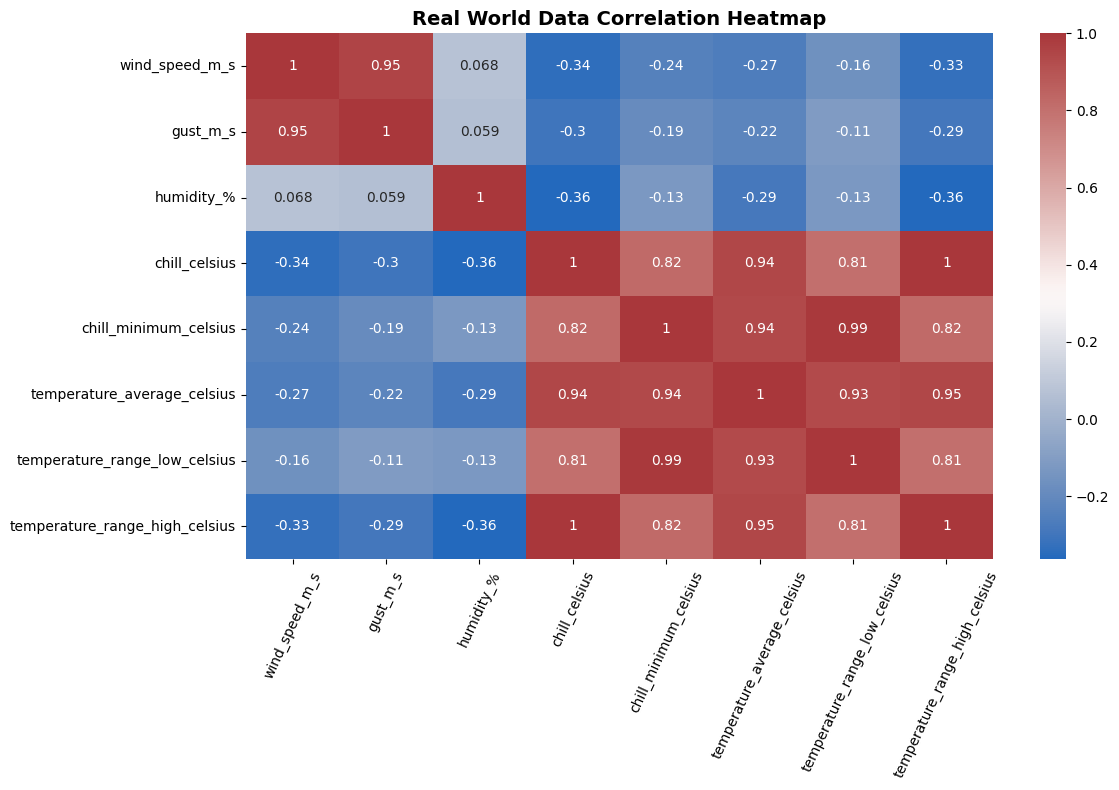

In [13]:
plt.rcParams["figure.autolayout"] = True

fig, (ax1) = plt.subplots(1,1, figsize=(12, 8))
sns.heatmap(corr_variable, cmap="vlag", ax=ax1, annot = True).set_title('Real World Data Correlation Heatmap', color='black', size=14, weight='bold')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 65)
plt.show()

Correlation can also be visualised by using the pairplot function in Seaborn (www.pluralsight.com, n.d.). Further insight is gained as to the relationship between the variables that have a correlation.

In this case of the weather dataset:

+ there appears to be a linear relationship between gust speed and wind speed. As wind speed increases gust speed increases.

+ all of the temperature variables that have a correlation with each other have linear relationships. That is to say as the value of one variable increases the value of the other variable increases.

+ chill and the daily temperature high are different variables but very closely related. This is highlighted in the in the near straight diagonal line in the scatter plots below.

+ the daily temperature low and the wind chill minimum behave in a similar way in so far as they are different variables but have a very strong correlation.

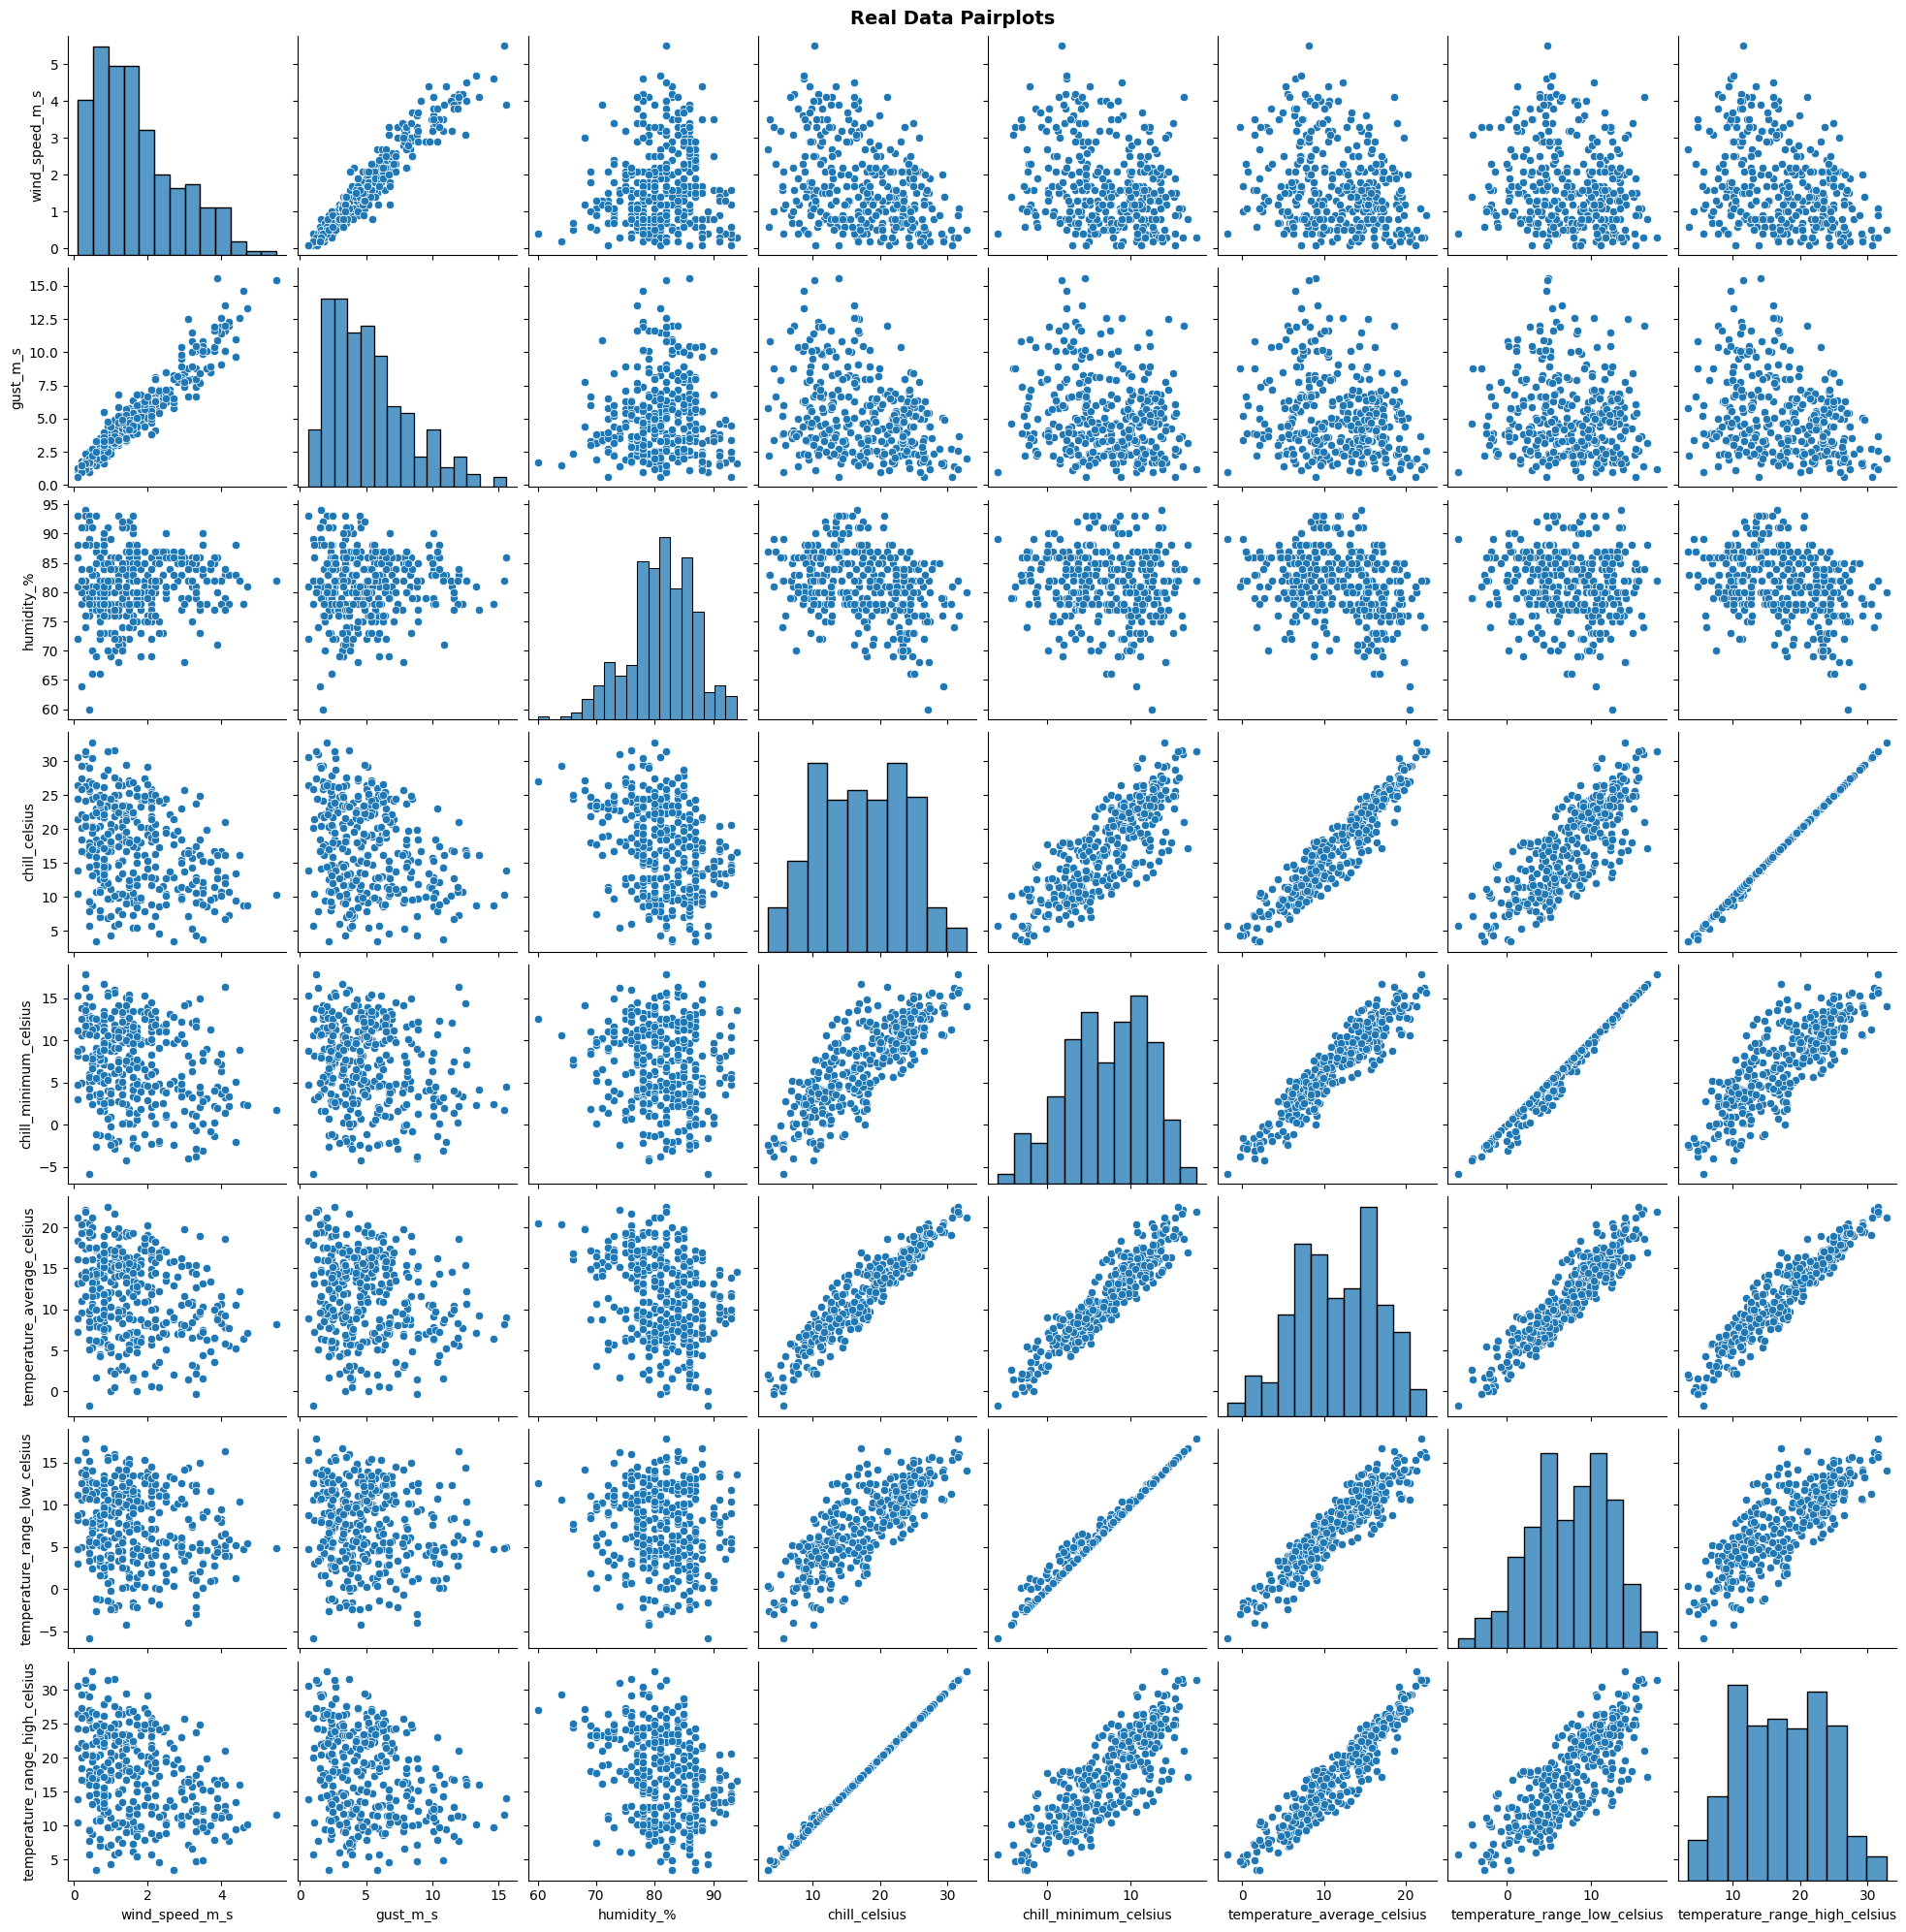

In [14]:
plt.rcParams["figure.autolayout"] = True
sns.pairplot(garden_weather, kind='scatter')
plt.suptitle('Real Data Pairplots', color='black', size=14, weight='bold', y=1)
plt.show()

The following sections explore the relationships between these variables in further detail.

### Wind and Gust Speed <a id="wind-and-gust-speed"></a>

Further exploring the relationship between wind speed and gust speed by plotting the trend line for each of these variables demonstrates that as wind speed increases and decreases so too does gust speed. It is also noteworthy that during the summer months there is a noticeable drop in wind and gust speed. This suggests seasonal variation to wind and gust speed patterns.

In [15]:
print(column_rename)

['date_time', 'wind_speed_m_s', 'gust_m_s', 'humidity_%', 'chill_celsius', 'chill_minimum_celsius', 'temperature_average_celsius', 'temperature_range_low_celsius', 'temperature_range_high_celsius']


In [16]:
#garden_weather[['temperature_average_celsius', 'outside_air_pres_hPa']].corr(method='spearman')

In [17]:
#garden_weather[['temperature_average_celsius', 'outside_air_pres_hPa']].corr(method='kendall')

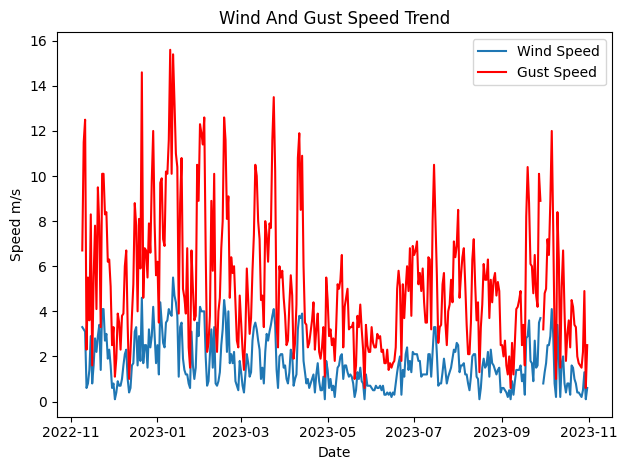

In [18]:
fig, ax = plt.subplots()
ax.plot(garden_weather['wind_speed_m_s'], label='Wind Speed')
ax.plot(garden_weather['gust_m_s'], label='Gust Speed', color='red')
ax.set_xlabel('Date')
ax.set_ylabel('Speed m/s')
ax.legend()
ax.set_title('Wind And Gust Speed Trend')
plt.show()

*Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.* (IBM, n.d.)

In the case of wind and gust speed it should be possible to predict gust speed based on the known wind speed. In this case wind speed in the independent variable and gust speed is the dependent variable.

In [19]:
# code adapted from https://www.w3schools.com/python/python_ml_linear_regression.asp

from scipy.stats import linregress

# drop rows with nan values - only 1 row, not significant
g_w = garden_weather.dropna()

x = g_w['wind_speed_m_s']
y = g_w['gust_m_s']

# assign outputs to variables 
slope, intercept, r, p, std_err = linregress(x, y)

The linear regression relationship between the two variables can be plotted and understood. The Pearson correlation coefficient returned is $\approx$ 0.95 which is very close to a perfect score of 1 and indicates a strong relationship.

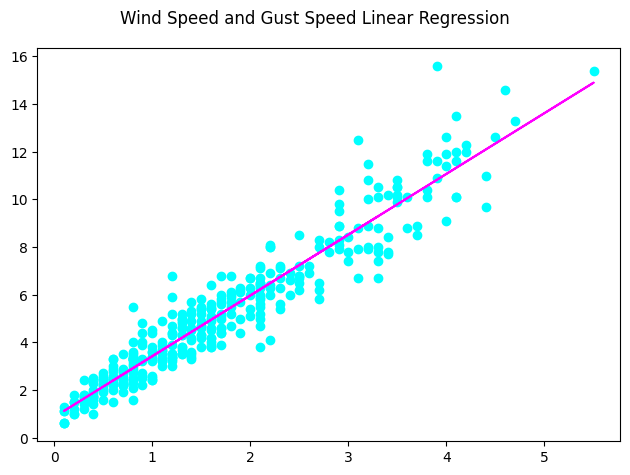

0.9543373620226426


In [20]:
# plot the linear regression
def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y, color='cyan')
plt.suptitle('Wind Speed and Gust Speed Linear Regression')
plt.plot(x, mymodel, color='magenta')
plt.show() 

# print the Pearson correlation coefficient
print(r)

The linear relationship between the variables can be used to predict values of the dependant variable. For example if we wnated to know what the gust would be at a wind speed of 5 m/s we can use the following code to understand that the projected gust speed is $\approx$ 13.6 m/s.

In [21]:
gust = myfunc(5)

print(gust)

13.618661908287683


### Temperature <a id="temperature"></a>

Plotting the daily temperature trends demonstrates that as one variables change, that change is mirrored in the other two variables.

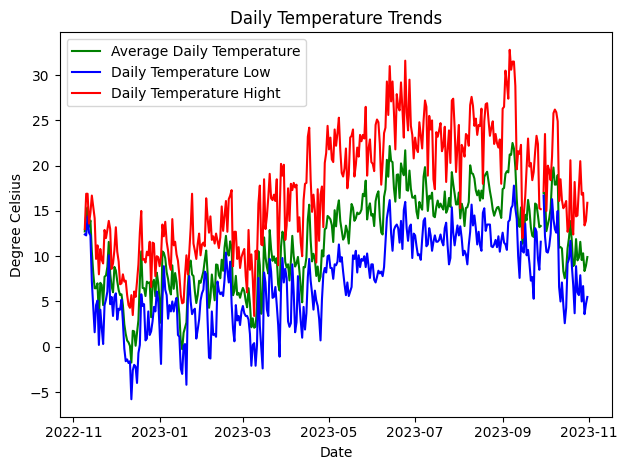

In [22]:
fig, ax = plt.subplots()
ax.plot(garden_weather['temperature_average_celsius'], label='Average Daily Temperature', color='green')
ax.plot(garden_weather['temperature_range_low_celsius'], label='Daily Temperature Low', color='blue')
ax.plot(garden_weather['temperature_range_high_celsius'], label='Daily Temperature Hight', color='red')
ax.set_xlabel('Date')
ax.set_ylabel('Degree Celsius')
ax.legend()
ax.set_title('Daily Temperature Trends')
plt.show()

In this instance average temperature is the dependant variable. As the daily low and high temperatures change this will impact the average daily temperature. Multiple regression can be used in this instance.

In the example below on a day with a temperature high of 10 and a low of 2 the predicted average temperature is $\approx$ 5.47.

In [23]:
# code adapted from https://www.w3schools.com/python/python_ml_multiple_regression. [Accessed 1 Dec. 2023]
from sklearn import linear_model

X = g_w[['temperature_range_low_celsius', 'temperature_range_high_celsius']]
y = g_w['temperature_average_celsius']

regr = linear_model.LinearRegression()
regr.fit(X.values, y.values)

#predict the avwerage temperature on a day with a high of 10 and a low of 2
predicted_av_temp = regr.predict([[2, 10]])

print(predicted_av_temp)

[5.46936047]


Printing the regression coefficient allows the relationship between the variables to be understood.

In [24]:
print(regr.coef_)

[0.53237697 0.43275659]


In this case increasing the daily low temperature by 1 degree the average temperature will increase by a factor 0.53 degrees. If the daily high temperature increases by 1 degree the average temperature will increase by 0.43 degrees.

To test this the minimum and maximum temperatures can be each increased by 1 degree.

$\therefore 5.47 + 0.53 + 0.43 = 6.43$

Using the prediction model this can be confirmed.

In [25]:
predicted_av_temp = regr.predict([[3, 11]])
print(predicted_av_temp)

[6.43449403]


### Chill <a id="chill"></a>

From the pairplots it is clear that the chill and minimum chill variables follow the same trend. As one variable falls or rises the other variable mirrors this fall or rise. This can be visualised.

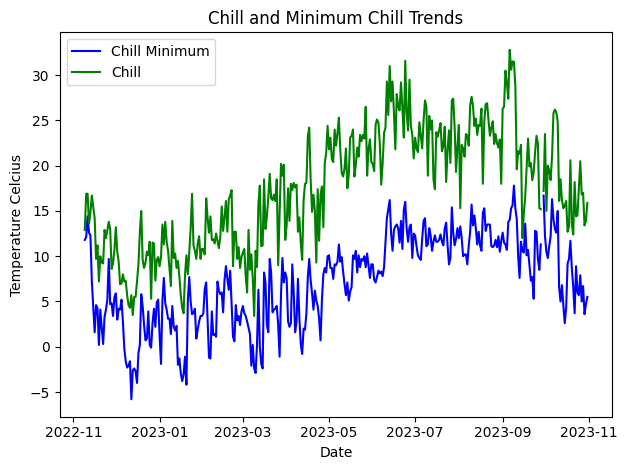

In [26]:
fig, ax = plt.subplots()
ax.plot(garden_weather['chill_minimum_celsius'], label='Chill Minimum', color='blue')
ax.plot(garden_weather['chill_celsius'], label='Chill', color='green')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature Celcius')
ax.legend()
ax.set_title('Chill and Minimum Chill Trends')
plt.show()

Using linear regression it is possible to understand the relationship between the two variables.

In [27]:
# assign variables for the dataset variables 
x = g_w['chill_minimum_celsius']
y = g_w['chill_celsius']

# assign outputs to variables 
slope, intercept, r, p, std_err = linregress(x, y)

Plotting the linear regression highlights the linear relationship between the variables. A high Pearson score of $\approx$ 0.82 supports the correlation between the two variables.

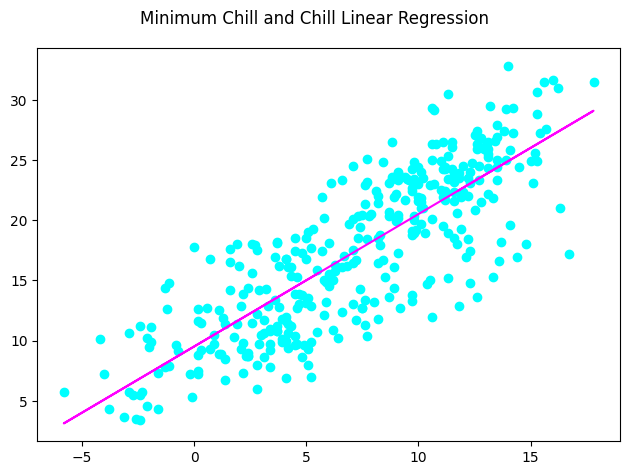

0.8215738717705997


In [28]:
mymodel_chill = list(map(myfunc, x))

plt.scatter(x, y, color='cyan')
plt.suptitle('Minimum Chill and Chill Linear Regression')
plt.plot(x, mymodel_chill, color='magenta')
plt.show() 

# print the Pearson correlation coefficient
print(r)

### Humidity Variable <a id="humidity-variable"></a>

Literature states that humidity does not have a relationship with temperature (www.allthingstalk.com, n.d.). That is not to say that understanding humidity and being able to model it is not important as humidity does have an effect on human health - *"...human body experiences greater distress of waste heat burden at high humidity than at lower humidity, given equal temperatures."* (op. cit.). In a practical setting this can have an impact on the elderly or immunocompromised who may be vulnerable to dehydration.

### Time - Seasons <a id="time---seasons"></a>

Weather variables are subject to seasonal variation. For example, Harmel et al. (2002) and Ruff and Neelin (2012) provide evidence that the distribution of daily temperature data is skewed and that the skewness depends on the season.

As evidenced from the analysis carried out to date on the variables in the dataset there is seasonal variation. The average temperature variables have higher values in the summer and autumn months vs the winter and spring. The wind and gust variables have higher values in winter winter and spring than in summer and autumn.

---

## Random Probability Distribution <a id="random-probability-distribution"></a>

*"In probability theory and statistics, a [probability distribution](https://en.wikipedia.org/wiki/Probability_distribution) is the mathematical function that gives the probabilities of occurrence of different possible outcomes for an experiment."* (Wikipedia Contributors, 2019).

A python function can be defined in order to test the best probability distribution fit for a dataset variable. The function defined below tests for the most commonly used probability distributions in weather data modelling and returns the best fit distribution and . Literature on weather data probability modelling can be accessed [here](/journal_articles/).


The function uses the Kolmogorov-Smirnov (KS) goodness of fit test to see if the data being tested comes from the distribution the data is being compared to. The KS test is non parametric and works across all types off distributions (Arize AI, n.d.).


In [29]:
# adapted from code accessed here - https://stackoverflow.com/questions/37487830/how-to-find-probability-distribution-and-parameters-for-real-data-python-3 [Accessed 16 Nov. 2023]
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme", 'rayleigh', 'gamma', 'uniform', 'lognorm', 'logistic', 'gumbel_r', 'gumbel_l']
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

A second fit test function is defined. In this function the *lognorm*  and *Exponential Weibull* tests are not performed. The reason for this is that testing for the *lognorm* and *Exponeniated Weibull* and are throwing errors on some seasonal variables due to the presence of negative integers in the datasets.

In [30]:
def no_exp_get_best_distribution(data):
    dist_names = ["norm", "weibull_max", "weibull_min", "pareto", "genextreme", 'rayleigh', 'gamma', 'uniform', 'logistic', 'gumbel_r', 'gumbel_l']
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)
        params[dist_name] = param
        D, p = st.kstest(data, dist_name, args=param)
        dist_results.append((dist_name, p))
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

As previously discussed weather changes seasonally therefore it makes sense that probability distribution models that would fit during the summer months may not as well during the winter months. To this end each of the variables will be synthesised based on the seasons of the year. As per Wikipedia (Wikipedia Contributors, 2023), Ireland experiences 4 seasons:

- Winter = November, December & January
- Spring = February, March & April
- Summer = May, June & July
- Autumn = August, September & October

The full dataset is filtered into seasonal data and the data within each season is analysed as opposed to the full year.

In [31]:
# Filter DateFrame by seasons - https://kanoki.org/2022/07/16/pandas-filter-dates-by-month-hour-day-or-last-n-days-weeks/ [Accessed 8 Nov. 2023]. 
winter = garden_weather[garden_weather.index.month_name().isin(['November', 'December', 'January'])].sort_index(ascending=True)
spring = garden_weather[garden_weather.index.month_name().isin(['February', 'March', 'April'])].sort_index(ascending=True)
summer = garden_weather[garden_weather.index.month_name().isin(['May', 'June', 'July'])].sort_index(ascending=True)
autumn = garden_weather[garden_weather.index.month_name().isin(['August', 'September', 'October'])].sort_index(ascending=True)

As the number of days in each season is not equal it is useful to create a variable that equates to the number of days in the season. This variable is used when modelling the seasonal data for each variable.

In [32]:
# define a variable for the number of rows that equals the number of days in each season
winter_rows = winter.shape[0]
spring_rows = spring.shape[0]
summer_rows = summer.shape[0]
autumn_rows = summer.shape[0]

Before any assessment of distribution fit or data modelling the presence of null values in the dataset must be addressed. This is achieved by replacing null them with the median value. The null values are located in spring and autumn.

In [33]:
autumn.isnull().sum()

date_time                         0
wind_speed_m_s                    1
gust_m_s                          1
humidity_%                        1
chill_celsius                     1
chill_minimum_celsius             1
temperature_average_celsius       1
temperature_range_low_celsius     1
temperature_range_high_celsius    1
dtype: int64

In [34]:
# replace nan values with the median - Zach (2022).
autumn = autumn.fillna(autumn.median(numeric_only=True))

Once the null values have been desalt with the dataset can be validated to double check that no null values remain.

In [35]:
#validate na corrective action
autumn.isnull().sum()

date_time                         0
wind_speed_m_s                    0
gust_m_s                          0
humidity_%                        0
chill_celsius                     0
chill_minimum_celsius             0
temperature_average_celsius       0
temperature_range_low_celsius     0
temperature_range_high_celsius    0
dtype: int64

### Wind Speed <a id="wind-speed"></a>

Literature suggests that the Rayleigh distribution can be used to model wind speed. 

*Rayleigh's distribution can be used to describe the wind variations in a wind regime with an acceptable level of accuracy without the need for data collected over short time intervals, as is the case of the Weibull distribution, because in many cases, such information cannot be available.* (Paraschiv, Paraschiv and Ion, 2019).

The wind speed variable in the dataset is an average daily value which relative to an hourly value is a much longer time interval and therefore would be better suited to the Rayleigh model than the Weibull distribution.

The probability density function (PDF) of the Rayleigh is expressed mathematically as:

$f(x;\sigma )={\frac {x}{\sigma ^{2}}}e^{-x^{2}/(2\sigma ^{2})},\quad x\geq 0,$

where $\sigma$ is the scale parameter of the distribution.

The graphic below illustrates the effect of scale ($\sigma$) on the Rayleigh distribution PDF.

**Rayleigh Distribution** - Krishnavedala, CC0, via Wikimedia Commons

![Rayleigh Distribution Curves](images/illustrations/768px-Rayleigh_distributionPDF.svg.png "Rayleigh Distribution Curve")

Using numpy it is possible to draw samples from the Rayleigh distribution. The python syntax of the Rayleigh distribution is `random.Generator.rayleigh(scale=1.0, size=None)`. The scale also equals the mode also equals the mode (numpy.org, n.d.).

Plotting histograms of the distribution of the wind speed variable gives an illustration of the fit of the probability distribution model.

Using the *scipy* library it is possible to calculate the Rayleigh parameters (location and scale), for each season, using the `fit()` method.

Define variables for the Rayleigh parameters that are required to draw samples from the Rayleigh distribution.

In [36]:
from scipy import stats

winter_loc, winter_scale = stats.rayleigh.fit(winter['wind_speed_m_s'])
spring_loc, spring_scale = stats.rayleigh.fit(spring['wind_speed_m_s'])
summer_loc, summer_scale = stats.rayleigh.fit(summer['wind_speed_m_s'])
autumn_loc, autumn_scale = stats.rayleigh.fit(autumn['wind_speed_m_s'])

Once the location and fit parameters are known they can be used to plot the probability density function over a histogram of the dataset to give a visual representation of the fit of the Rayleigh probability distribution function.

Define a variable for the x axis on the probability plot.

In [37]:
# code adapted from https://stackoverflow.com/questions/63637144/python-rayleigh-fit-histogram [Accessed 15 Nov. 2023].

winter_xl = np.linspace(winter['wind_speed_m_s'].min(), winter['wind_speed_m_s'].max())
spring_xl = np.linspace(spring['wind_speed_m_s'].min(), spring['wind_speed_m_s'].max())
summer_xl = np.linspace(summer['wind_speed_m_s'].min(), summer['wind_speed_m_s'].max())
autumn_xl = np.linspace(winter['wind_speed_m_s'].min(), autumn['wind_speed_m_s'].max())

Plot histograms of the wind speed variable for each season and overlay the Rayleigh probability distribution for that season over the histogram. This allows visualisation of the fit of the Rayleigh probability distribution on the seasonal wind speed variables.

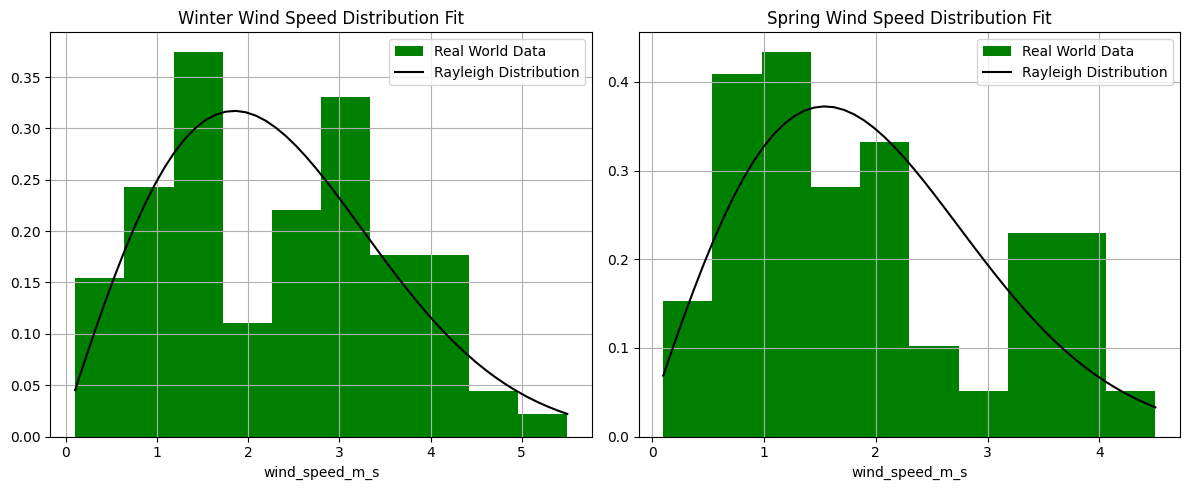

In [38]:
# Create an empty plot.
fig, axe = plt.subplots(1, 2, figsize=(12,5))

# Display Results:
axe[0].hist(winter['wind_speed_m_s'],density=1, label="Real World Data", color='green')
axe[0].plot(winter_xl,stats.rayleigh(scale=winter_scale, loc=winter_loc).pdf(winter_xl), label="Rayleigh Distribution", color='black')
axe[0].set_title("Winter Wind Speed Distribution Fit")
axe[0].set_xlabel("wind_speed_m_s")
axe[0].legend()
axe[0].grid()
axe[1].hist(spring['wind_speed_m_s'],density=1, label="Real World Data", color='green')
axe[1].plot(spring_xl,stats.rayleigh(scale=spring_scale, loc=spring_loc).pdf(spring_xl), label="Rayleigh Distribution", color='black')
axe[1].set_title("Spring Wind Speed Distribution Fit")
axe[1].set_xlabel("wind_speed_m_s")
axe[1].legend()
axe[1].grid()


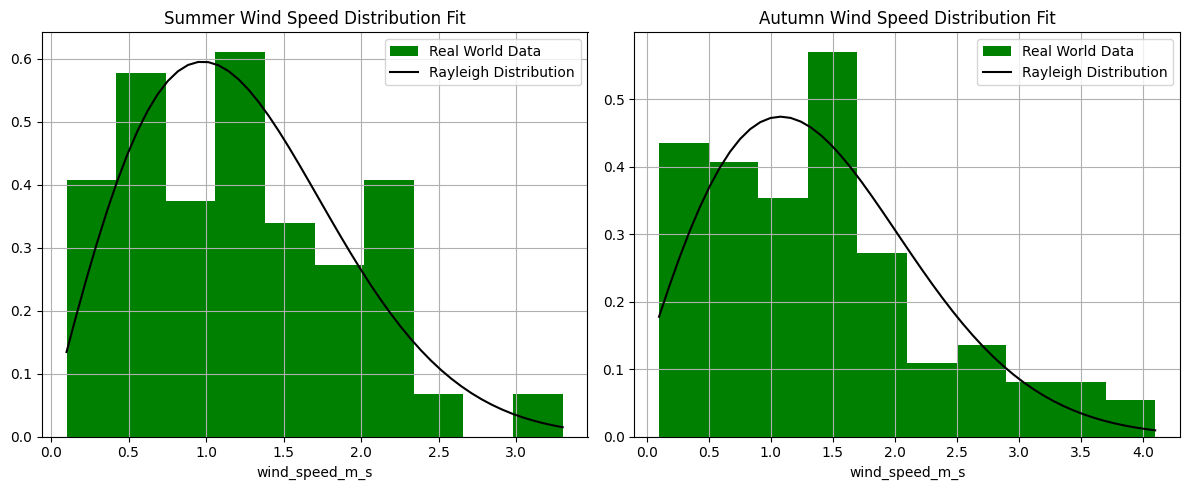

In [39]:
# Create an empty plot.
fig, axe = plt.subplots(1, 2, figsize=(12,5))

# Display Results:
axe[0].hist(summer['wind_speed_m_s'],density=1, label="Real World Data", color='green')
axe[0].plot(summer_xl,stats.rayleigh(scale=summer_scale, loc=summer_loc).pdf(summer_xl), label="Rayleigh Distribution", color='black')
axe[0].set_title("Summer Wind Speed Distribution Fit")
axe[0].set_xlabel("wind_speed_m_s")
axe[0].legend()
axe[0].grid()
axe[1].hist(autumn['wind_speed_m_s'],density=1, label="Real World Data", color='green')
axe[1].plot(autumn_xl,stats.rayleigh(scale=autumn_scale, loc=autumn_loc).pdf(autumn_xl), label="Rayleigh Distribution", color='black')
axe[1].set_title("Autumn Wind Speed Distribution Fit")
axe[1].set_xlabel("wind_speed_m_s")
axe[1].legend()
axe[1].grid()

The PDF of the Rayleigh distribution does not appear to be a good fit. Applying a more scientific approach to probability distribution fit yields different results.

In [40]:
get_best_distribution(winter['wind_speed_m_s'])

Best fitting distribution: exponweib
Best p value: 0.6821732124385185
Parameters for the best fit: (0.27503724293176923, 4.5263439574972955, 0.08118342282389561, 3.839729030711695)


With a fit score $\approx$ 0.68, vs $\approx$ 0.3 for Rayleigh, the *exponweib* distrubtion is the best fit out of commonly used weather probability distributions. The Exponentiated Weibull distribution is an extension of the Weibull distribution.

Expressed mathematically the density of of the Exponentiated Weibull distribution is:

$f(x;k,\lambda; \alpha) = \alpha  \frac{k}{\lambda}\left[\frac{x}{\lambda}\right]^{k-1}\left[1- e^{-(x/\lambda)^k} \right]^{\alpha-1}e^{-(x/\lambda)^k}$

k is the first shape parameter, α is the second shape parameter and λ is the scale parameter of the distribution.

In [41]:
# import exponweib from SciPy
from scipy.stats import exponweib

The Exponential Weibull PDF is visualised over the distribution with the following code. The appearance of the PDF appears to be a better fit on the synthesised data. It is worth noting that as this is a visual check it is subjective.

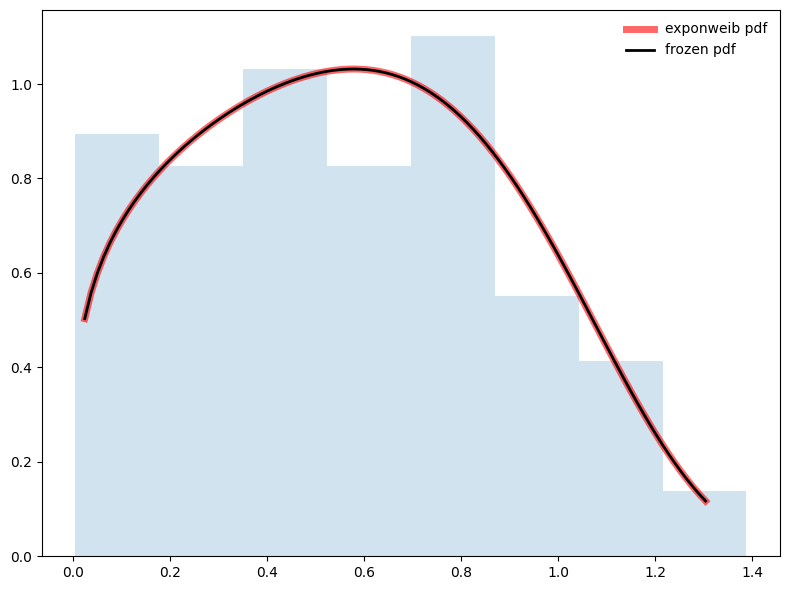

In [42]:
# create an empty plot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# define distribujtion parameters
a, c = 0.27503724293176923, 4.5263439574972955

# define x axis for PDF
x = np.linspace(exponweib.ppf(.01, a, c), exponweib.ppf(.99, a, c), 100)

# plot exponweib PDF
ax.plot(x, exponweib.pdf(x, a, c), 'r-', lw=5, alpha=0.6, label='exponweib pdf')

rv = exponweib(a, c)

# plot frozen PDF
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

r = exponweib.rvs(0.27503724293176923, 4.5263439574972955, size=winter_rows)

ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

The spring, summer and autumn distributions are tested for the best fit probability distributions. It is noted worthy that two out of the four distributions are the Exponeniated Weibull. This would suggest that it may be a good probability distribution to model wind speed. Also of note is that all four distributions are a variation on the Weibull distribution.

In [43]:
get_best_distribution(spring['wind_speed_m_s'])

Best fitting distribution: weibull_min
Best p value: 0.47039408529885784
Parameters for the best fit: (1.686915750837759, 0.05214958079737202, 2.0938087377064027)


In [44]:
get_best_distribution(summer['wind_speed_m_s'])

Best fitting distribution: exponweib
Best p value: 0.909743219742408
Parameters for the best fit: (0.527150521065729, 2.4073099967209144, 0.09066482072729054, 1.6824407813453073)


In [45]:
no_exp_get_best_distribution(autumn['wind_speed_m_s'])

Best fitting distribution: weibull_max
Best p value: 0.7376875596077592
Parameters for the best fit: (44848430.05044524, 31526631.18699876, 31526630.233248726)


The best fit distribution for the wind speed variable are summarised as follows:

| Season    | Variable          |Best Fit Distribution      |
| :-----    | :-------          |:----------                |
| Winter    | wind_speed_m_s    | Exponentiated Weibull     |
| Spring    | wind_speed_m_s    | Weibull Minimum           |
| Summer    | wind_speed_m_s    | Exponentiated Weibull     |
| Autumn    | wind_speed_m_s    | Weibull Maximum           |

To model the data, samples are randomly drawn from the relevant distributions:

In [46]:
# import the required probability distribution from SciPy
from scipy.stats import weibull_min
from scipy.stats import exponweib
from scipy.stats import weibull_max

In [47]:
# synthesise data based on the parameters of the best fit probability distribution models 
winter_wind_speed_model = exponweib.rvs(0.27503724293176923, 4.5263439574972955, 0.08118342282389561, 3.839729030711695, size = winter_rows)
spring_wind_speed_model = weibull_min.rvs(1.686915750837759, 0.05214958079737202, 2.0938087377064027, size = spring_rows)
summer_wind_speed_model = exponweib.rvs(0.527150521065729, 2.4073099967209144, 0.09066482072729054, 1.6824407813453073, size = summer_rows)
autumn_wind_speed_model = weibull_max.rvs(44848430.05044524, 31526631.18699876, 31526630.233248726, size = autumn_rows)

### Gust Speed <a id="gust-speed"></a>

As the gust speed variable is a measure of wind variations over time it can be modelled in the same as wind speed using Rayleigh distribution. 

Calculate the Rayleigh parameters (location and scale), for each season, using the `fit()` method.

In [48]:
winter_gust_loc, winter_gust_scale = stats.rayleigh.fit(winter['gust_m_s'])
spring_gust_loc, spring_gust_scale = stats.rayleigh.fit(spring['gust_m_s'])
summer_gust_loc, summer_gust_scale = stats.rayleigh.fit(summer['gust_m_s'])
autumn_gust_loc, autumn_gust_scale = stats.rayleigh.fit(autumn['gust_m_s'])

Define a variable for the x axis on the probability plot.

In [49]:
winter_gust_xl = np.linspace(winter['gust_m_s'].min(), winter['gust_m_s'].max())
spring_gust_xl = np.linspace(spring['gust_m_s'].min(), spring['gust_m_s'].max())
summer_gust_xl = np.linspace(summer['gust_m_s'].min(), summer['gust_m_s'].max())
autumn_gust_xl = np.linspace(winter['gust_m_s'].min(), autumn['gust_m_s'].max())

Plot the Raleigh distribution and overlay the PDF in order to get a visual illustration of the model fit.

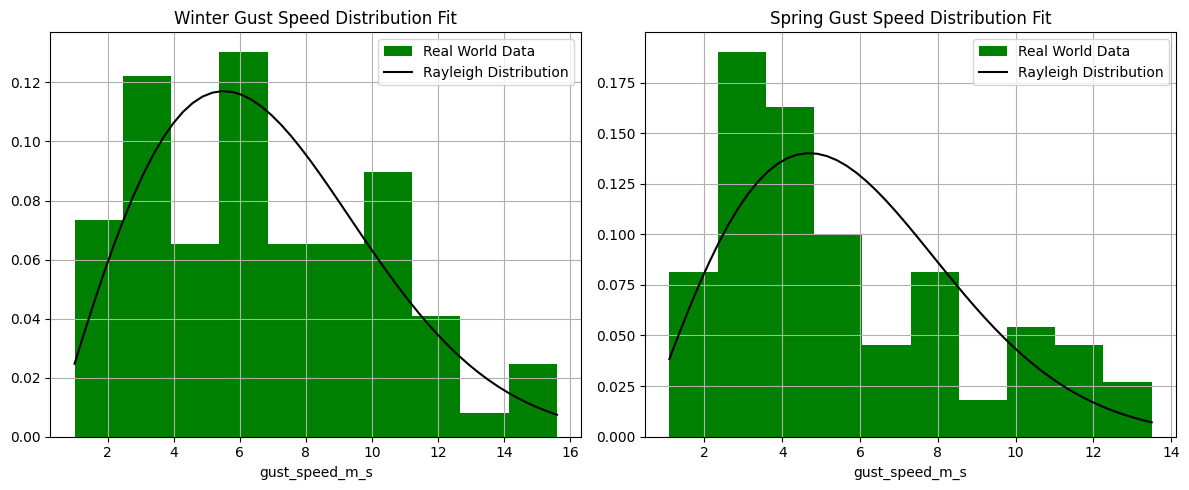

In [50]:
# Create an empty plot.
fig, axe = plt.subplots(1, 2, figsize=(12,5))

# plot the distributions and PDF
axe[0].hist(winter['gust_m_s'],density=1, label="Real World Data", color='green')
axe[0].plot(winter_gust_xl,stats.rayleigh(scale=winter_gust_scale, loc=winter_gust_loc).pdf(winter_gust_xl), label="Rayleigh Distribution", color='black')
axe[0].set_title("Winter Gust Speed Distribution Fit")
axe[0].set_xlabel('gust_speed_m_s')
axe[0].legend()
axe[0].grid()
axe[1].hist(spring['gust_m_s'],density=1, label="Real World Data", color='green')
axe[1].plot(spring_gust_xl,stats.rayleigh(scale=spring_gust_scale, loc=spring_gust_loc).pdf(spring_gust_xl), label="Rayleigh Distribution", color='black')
axe[1].set_title("Spring Gust Speed Distribution Fit")
axe[1].set_xlabel('gust_speed_m_s')
axe[1].legend()
axe[1].grid()

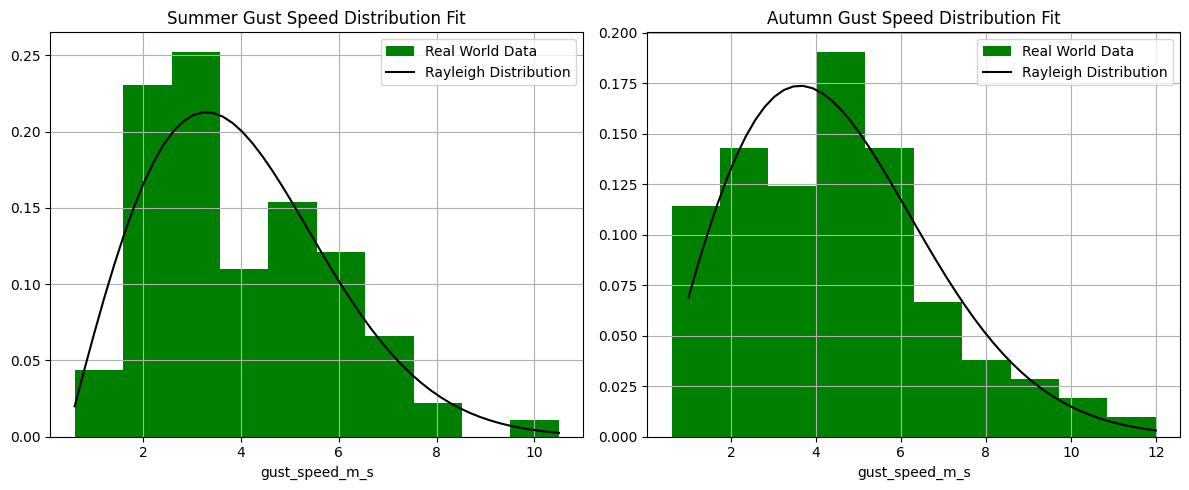

In [51]:
# Create an empty plot.
fig, axe = plt.subplots(1, 2, figsize=(12,5))

# plot the distributions and PDF

axe[0].hist(summer['gust_m_s'],density=1, label="Real World Data", color='green')
axe[0].plot(summer_gust_xl,stats.rayleigh(scale=summer_gust_scale, loc=summer_gust_loc).pdf(summer_gust_xl), label="Rayleigh Distribution", color='black')
axe[0].set_title("Summer Gust Speed Distribution Fit")
axe[0].set_xlabel("gust_speed_m_s")
axe[0].legend()
axe[0].grid()

axe[1].hist(autumn['gust_m_s'],density=1, label="Real World Data", color='green')
axe[1].plot(autumn_gust_xl,stats.rayleigh(scale=autumn_gust_scale, loc=autumn_gust_loc).pdf(autumn_gust_xl), label="Rayleigh Distribution", color='black')
axe[1].set_title("Autumn Gust Speed Distribution Fit")
axe[1].set_xlabel("gust_speed_m_s")
axe[1].legend()
axe[1].grid()

Once again visually the Rayleigh distribution does not look like a good fit. Testing the variables using the fit test gives a more scientific measure of the best fit probability distribution.

In [52]:
get_best_distribution(winter['gust_m_s'])

Best fitting distribution: exponweib
Best p value: 0.8248795976210808
Parameters for the best fit: (0.3728841526180775, 3.20036258027839, 0.9578959419085717, 9.583125810337737)


In [53]:
get_best_distribution(spring['gust_m_s'])

Best fitting distribution: lognorm
Best p value: 0.9111480663528143
Parameters for the best fit: (0.5836265765155182, 0.09359040160557448, 4.705269873959963)


In [54]:
get_best_distribution(summer['gust_m_s'])

Best fitting distribution: gamma
Best p value: 0.563118093901831
Parameters for the best fit: (4.86425634339127, -0.16421006810552352, 0.8587654709989414)


In [55]:
get_best_distribution(autumn['gust_m_s'])

Best fitting distribution: rayleigh
Best p value: 0.9148765601095433
Parameters for the best fit: (0.1327210847310841, 3.49026626468912)


The best fit distribution for the gust speed variable are summarised as follows:

| Season    | Variable    |Best Fit Distribution    |
| :-----    | :-------    |:----------              |
| Winter    | gust_m_s    | Exponentiated Weibull   |
| Spring    | gust_m_s    | Log Normal              |
| Summer    | gust_m_s    | Gamma                   |
| Autumn    | gust_m_s    | Rayleigh                |

To model the data, samples are randomly drawn from the relevant distributions:

In [56]:
# import the required distributions from SciPy
from scipy.stats import lognorm
from scipy.stats import gamma
from scipy.stats import rayleigh

In [57]:
winter_gust_speed_model = exponweib.rvs(0.3728841526180775, 3.20036258027839, 0.9578959419085717, 9.583125810337737, size = winter_rows)
spring_gust_speed_model = lognorm.rvs(0.5836265765155182, 0.09359040160557448, 4.705269873959963, size = spring_rows)
summer_gust_speed_model = gamma.rvs(4.86425634339127, -0.16421006810552352, 0.8587654709989414, size = summer_rows)
autumn_gust_speed_model = rayleigh.rvs(0.1327210847310841, 3.49026626468912, size = autumn_rows)

### Humidity <a id="humidity"></a>

Literature suggests that the normal distribution is the best fit distribution for relative humidity probability modelling (Musa Esıt, 2022). In a study on Turkish weather station data Musa Esıt (2022) found that the normal distribution was the best probability fit for two out of the three weather station's humidity data in the study.

*Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean* (Chen, 2021).

The standard distribution characteristic bell curve is illustrated below demonstrating that there is a 95.4% chance that a value will fall within two standard deviations of the mean.

**Standard Probability Distribution** - By Ainali - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=3141713

![Normal Distribution Curve](images/illustrations/Standard_deviation_diagram_micro.svg.png "Normal Distribution Curve")

In mathematical terms the normal distribution probability density function is expressed as:

${\displaystyle f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}}$

where:
- $x$ = value of the variable or data being examined and $f(x)$ the probability function
- $\mu =$ the mean
- $\sigma =$ the standard deviation

The python syntax for the Gaussian distribution is:

`random.normal(loc=0.0, scale=1.0, size=None)`

- loc = mean of the distribution
- scale = standard deviation of the distribution
- size = output shape

A function can be created to return the probability density curve (PDF) for the normal distribution using the desired the mean and standard deviation parameters .

In [58]:
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

The PDF for the data can then be plotting against the range of values. The following lines of code use the the minimum, maximum and the number of values for the x-axis values to plot the PDF.

In [59]:
winter_humidity_xl = np.linspace(winter.describe()['humidity_%']['min'], winter.describe()['humidity_%']['max'], winter_rows)
spring_humidity_xl = np.linspace(spring.describe()['humidity_%']['min'], spring.describe()['humidity_%']['max'], spring_rows)
summer_humidity_xl = np.linspace(summer.describe()['humidity_%']['min'], summer.describe()['humidity_%']['max'], summer_rows)
autumn_humidity_xl = np.linspace(autumn.describe()['humidity_%']['min'], autumn.describe()['humidity_%']['max'], autumn_rows)

Define seasonal humidity variables and pass all required parameters to the PDF function.

In [60]:
norm_winter_humidity_pdf = normal_dist(winter_humidity_xl, winter.describe()['humidity_%']['mean'], winter.describe()['humidity_%']['std'])
norm_spring_humidity_pdf = normal_dist(spring_humidity_xl, spring.describe()['humidity_%']['mean'], spring.describe()['humidity_%']['std'])
norm_summer_humidity_pdf = normal_dist(summer_humidity_xl, summer.describe()['humidity_%']['mean'], summer.describe()['humidity_%']['std'])
norm_autumn_humidity_pdf = normal_dist(autumn_humidity_xl, autumn.describe()['humidity_%']['mean'], autumn.describe()['humidity_%']['std'])

Plotting the results demonstrates that, apart from possibly the summer humidity data, that standard distribution is not a good probability distribution fit for the real world humidity data in the dataset.

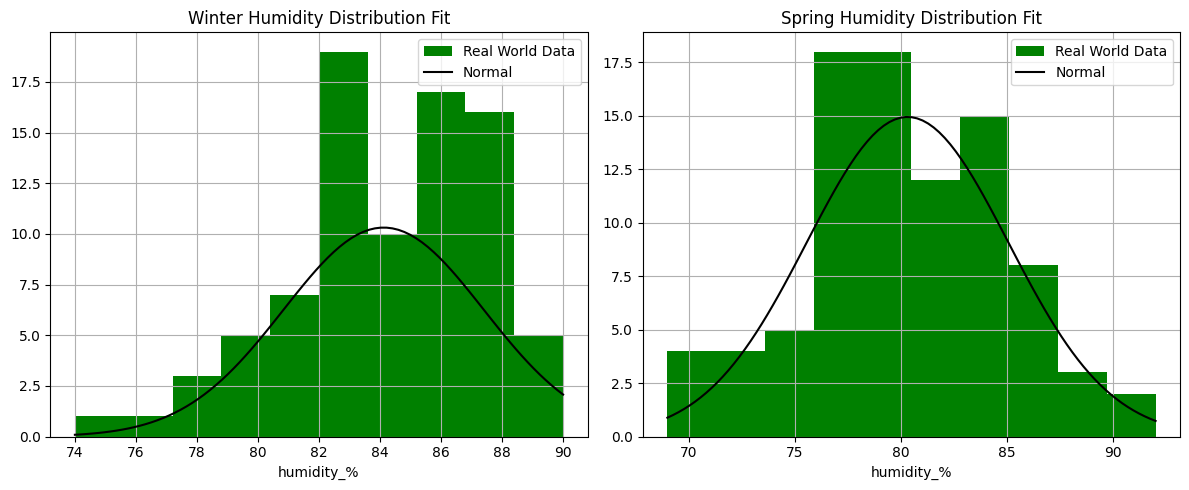

In [61]:
# Create an empty plot.
fig, axe = plt.subplots(1, 2, figsize=(12,5))

# plot the distributions and PDF
axe[0].hist(winter['humidity_%'], label="Real World Data", color='green', bins=10)
axe[0].plot(winter_humidity_xl, norm_winter_humidity_pdf, label="Normal", color='black')
axe[0].set_title("Winter Humidity Distribution Fit")
axe[0].set_xlabel("humidity_%")
axe[0].legend()
axe[0].grid()
axe[1].hist(spring['humidity_%'], label="Real World Data", color='green', bins=10)
axe[1].plot(spring_humidity_xl, norm_spring_humidity_pdf, label="Normal", color='black')
axe[1].set_title("Spring Humidity Distribution Fit")
axe[1].set_xlabel("humidity_%")
axe[1].legend()
axe[1].grid()


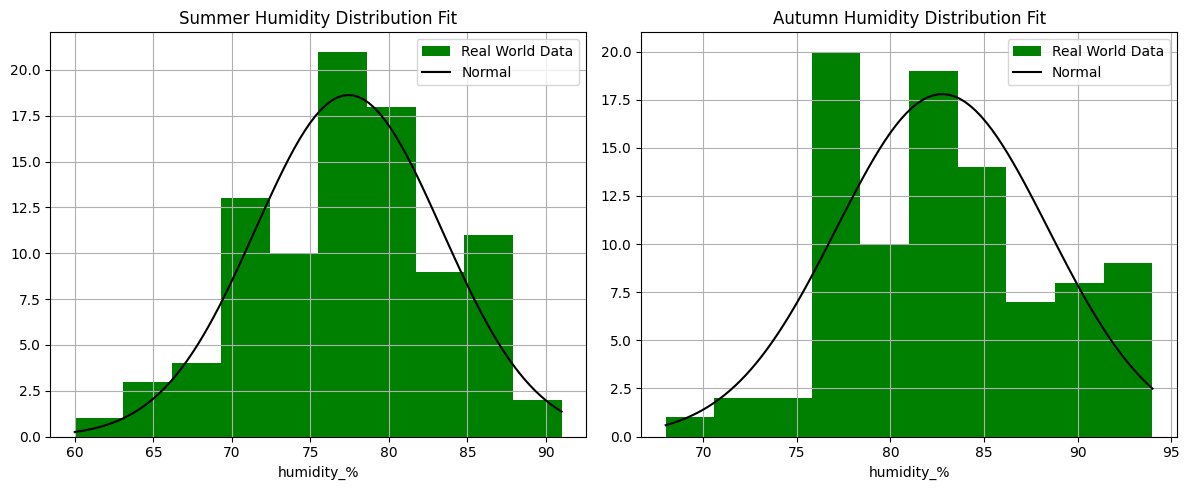

In [62]:
# Create an empty plot.
fig, axe = plt.subplots(1, 2, figsize=(12,5))

# plot the distributions and PDF
axe[0].hist(summer['humidity_%'], label="Real World Data", color='green', bins=10)
axe[0].plot(summer_humidity_xl, norm_summer_humidity_pdf, label="Normal", color='black')
axe[0].set_title("Summer Humidity Distribution Fit")
axe[0].set_xlabel("humidity_%")
axe[0].legend()
axe[0].grid()
axe[1].hist(autumn['humidity_%'], label="Real World Data", color='green', bins=10)
axe[1].plot(autumn_humidity_xl, norm_autumn_humidity_pdf, label="Normal", color='black')
axe[1].set_title("Autumn Humidity Distribution Fit")
axe[1].set_xlabel("humidity_%")
axe[1].legend()
axe[1].grid()


Using SciPy the best fit model can be found.

In [63]:
no_exp_get_best_distribution(winter['humidity_%'])

Best fitting distribution: gumbel_l
Best p value: 0.10871562615053398
Parameters for the best fit: (85.66341062368984, 2.737922584354145)


In [64]:
get_best_distribution(spring['humidity_%'])

Best fitting distribution: gamma
Best p value: 0.7027970081653199
Parameters for the best fit: (862.9329696196596, -58.94536431506131, 0.16138592797931123)


In [65]:
no_exp_get_best_distribution(summer['humidity_%'])

Best fitting distribution: weibull_min
Best p value: 0.8729780297829178
Parameters for the best fit: (5.250976141121197, 50.52367554222906, 29.23180589691651)


In [66]:
no_exp_get_best_distribution(autumn['humidity_%'])

Best fitting distribution: gumbel_r
Best p value: 0.7423408160935221
Parameters for the best fit: (80.03562176522694, 5.223133901010559)


The best fit distribution for the humidity variable are summarised as follows:

| Season    | Variable      |Best Fit Distribution    |
| :-----    | :-------      |:----------              |
| Winter    | humidity_%    | Gumbel Left Skewed      |
| Spring    | humidity_%    | Gamma                   |
| Summer    | humidity_%    | Weibull Minimum         |
| Autumn    | humidity_%    | Gumbel Right Skewed     |

To model the data, samples are randomly drawn from the relevant distributions:

In [67]:
from scipy.stats import gumbel_l
from scipy.stats import gumbel_r

winter_humidity_model = gumbel_l.rvs(85.66341062368984, 2.737922584354145, size = winter_rows)
spring_humidity_model = gamma.rvs(862.9329696196596, -58.94536431506131, 0.16138592797931123, size = spring_rows)
summer_humidity_model = weibull_min.rvs(5.250976141121197, 50.52367554222906, 29.23180589691651, size = summer_rows)
autumn_humidity_model = gumbel_r.rvs(80.03562176522694, 5.223133901010559, size = autumn_rows)

### Average Wind Chill <a id="average-wind-chill"></a>

No literature was available with respect to wind chill probability modelling. Plotting histograms for the variable allows visualisation of the spread and frequency of the range of values in the chill variable. Inspecting the histograms of the data it could be argued that the distribution appears somewhat normal. However, this is a subjective interpretation.

[Text(0.5, 0, 'temperature_celsius'), Text(0, 0.5, 'count')]

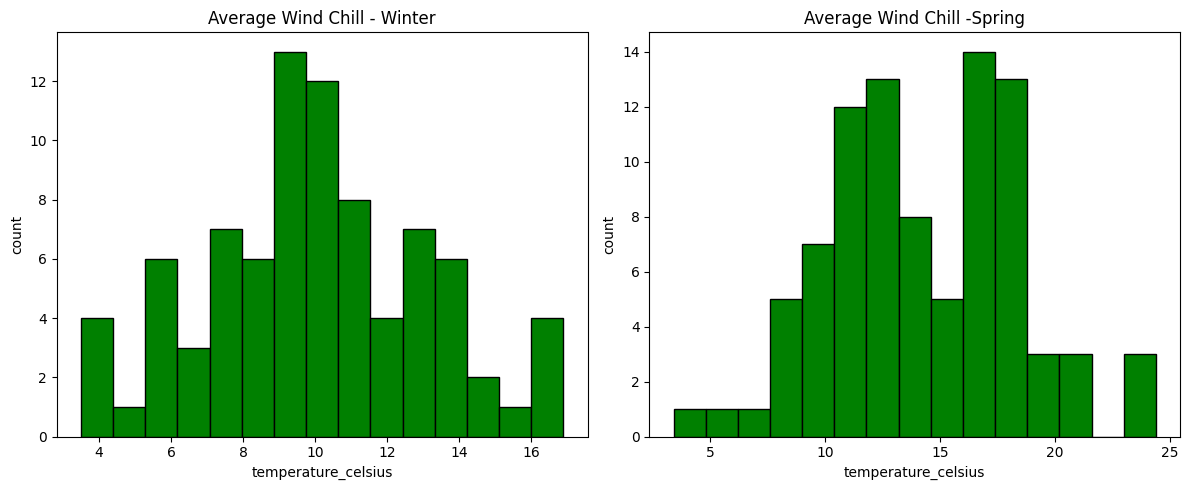

In [68]:
# Create an empty plot.
fig, axe = plt.subplots(1, 2, figsize=(12,5))

# plot the distributions
axe[0].hist(winter['chill_celsius'], color = 'green', edgecolor = 'black', bins=15)
axe[0].set_title("Average Wind Chill - Winter")
axe[0].set(xlabel='temperature_celsius', ylabel='count')
axe[1].hist(spring['chill_celsius'], color = 'green', edgecolor = 'black', bins=15)
axe[1].set_title("Average Wind Chill -Spring")
axe[1].set(xlabel='temperature_celsius', ylabel='count')

[Text(0.5, 0, 'temperature_celsius'), Text(0, 0.5, 'count')]

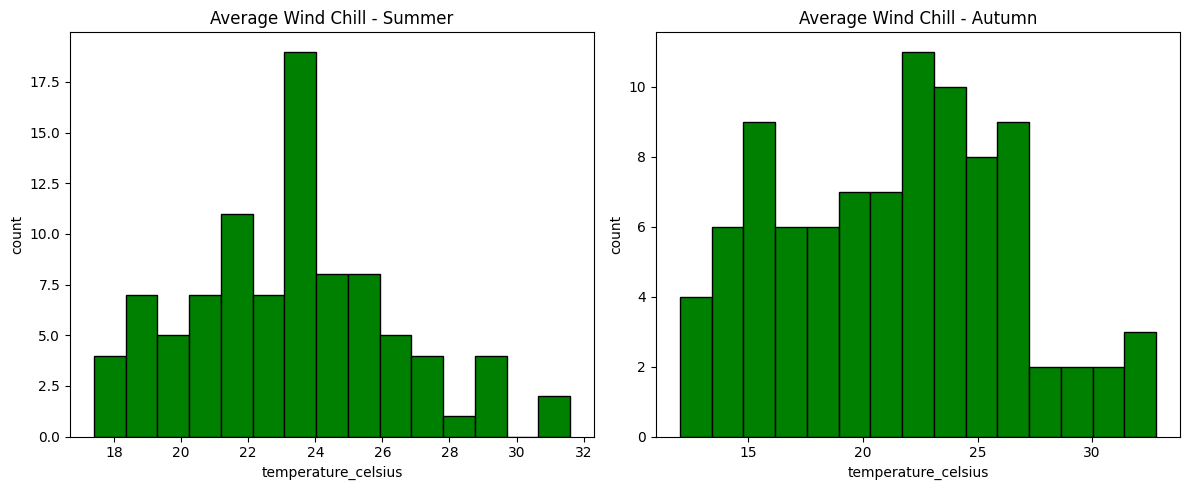

In [69]:
# Create an empty plot.
fig, axe = plt.subplots(1, 2, figsize=(12,5))

# plot the distributions
axe[0].hist(summer['chill_celsius'], color = 'green', edgecolor = 'black', bins=15)
axe[0].set_title("Average Wind Chill - Summer")
axe[0].set(xlabel='temperature_celsius', ylabel='count')
axe[1].hist(autumn['chill_celsius'], color = 'green', edgecolor = 'black', bins=15)
axe[1].set_title("Average Wind Chill - Autumn")
axe[1].set(xlabel='temperature_celsius', ylabel='count')


To asses the best fit probability distribution models, in a less subjective way, testing the seasonal chill variables using SciPy allows identification of the best fit model.

In [70]:
get_best_distribution(winter['chill_celsius'])

Best fitting distribution: norm
Best p value: 0.9760207947196633
Parameters for the best fit: (10.05595238095238, 3.1464019961762597)


In [71]:
get_best_distribution(spring['chill_celsius'])

Best fitting distribution: weibull_min
Best p value: 0.7050042529648155
Parameters for the best fit: (3.5757587599850313, 1.059060939068513, 14.631938440937914)


In [72]:
no_exp_get_best_distribution(summer['chill_celsius'])

Best fitting distribution: logistic
Best p value: 0.9810279591638167
Parameters for the best fit: (23.150621106400116, 1.7432552219796873)


In [73]:
no_exp_get_best_distribution(autumn['chill_celsius'])

Best fitting distribution: genextreme
Best p value: 0.7998252426034103
Parameters for the best fit: (0.26935763218112546, 19.54692673249385, 4.842580970620443)


The best fit distribution for the chill variable are summarised as follows

| Season    | Variable          |Best Fit Distribution      |
| :-----    | :-------          |:----------                |
| Winter    | chill_celcius     | Normal                    |
| Spring    | chill_celcius     | Weibull Minimum           |
| Summer    | chill_celcius     | Logistic                  |
| Autumn    | chill_celcius     | Generalized Extreme       |

To model the data samples are randomly drawn from the relevant distributions:

In [74]:
from scipy.stats import norm
from scipy.stats import logistic
from scipy.stats import genextreme

winter_chill_model = norm.rvs(10.05595238095238, 3.1464019961762597, size = winter_rows)
spring_chill_model = weibull_min.rvs(3.5757587599850313, 1.059060939068513, 14.631938440937914, size = spring_rows)
summer_chill_model = logistic.rvs(23.150621106400116, 1.7432552219796873, size = summer_rows)
autumn_chill_model = genextreme.rvs(0.26935763218112546, 19.54692673249385, 4.842580970620443, size = autumn_rows)

### Wind Chill Minimum <a id="wind-chill-minimum"></a>

Visualising histograms of the minimum wind chill allows a subjective assessment of the variable. Once again the argument could be made for a standard distribution model based on the plotted histograms.

[Text(0.5, 0, 'value'), Text(0, 0.5, 'count')]

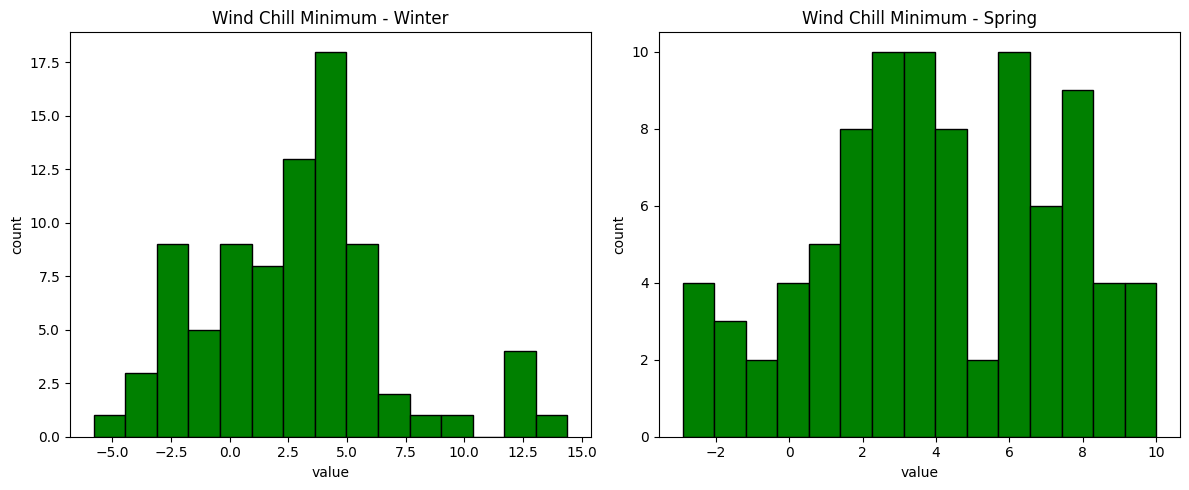

In [75]:
# Create an empty plot.
fig, axe = plt.subplots(1, 2, figsize=(12,5))

# plot the distributions
axe[0].hist(winter['chill_minimum_celsius'], color = 'green', edgecolor = 'black', bins=15)
axe[0].set_title("Wind Chill Minimum - Winter")
axe[0].set(xlabel='value', ylabel='count')
axe[1].hist(spring['chill_minimum_celsius'], color = 'green', edgecolor = 'black', bins=15)
axe[1].set_title("Wind Chill Minimum - Spring")
axe[1].set(xlabel='value', ylabel='count')

[Text(0.5, 0, 'value'), Text(0, 0.5, 'count')]

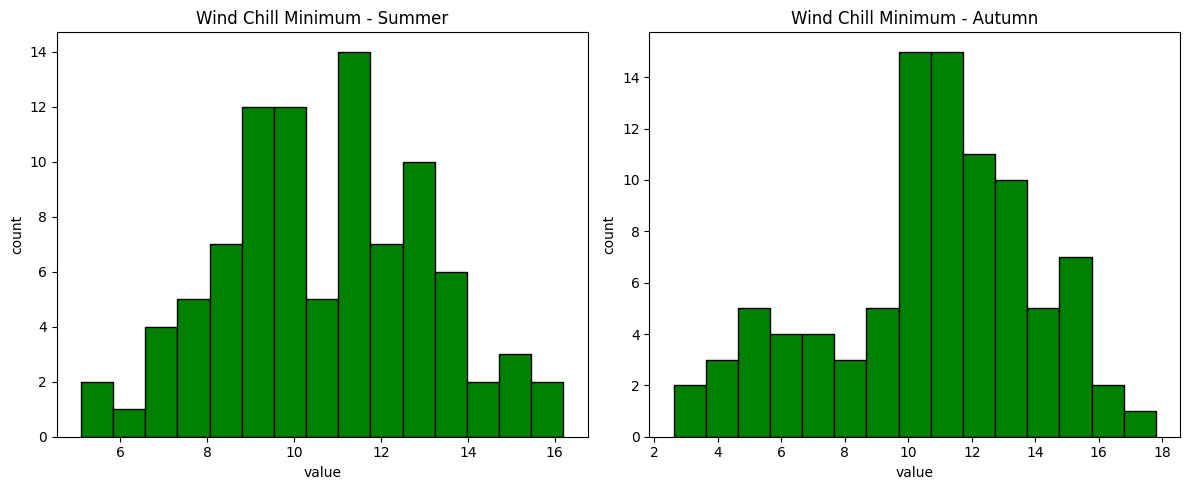

In [76]:
# Create an empty plot.
fig, axe = plt.subplots(1, 2, figsize=(12,5))

# plot the distributions
axe[0].hist(summer['chill_minimum_celsius'], color = 'green', edgecolor = 'black', bins=15)
axe[0].set_title("Wind Chill Minimum - Summer")
axe[0].set(xlabel='value', ylabel='count')
axe[1].hist(autumn['chill_minimum_celsius'], color = 'green', edgecolor = 'black', bins=15)
axe[1].set_title("Wind Chill Minimum - Autumn")
axe[1].set(xlabel='value', ylabel='count')

Applying a more scientific approach enables a better model fit for synthesis of the data set.

In [77]:
no_exp_get_best_distribution(winter['chill_minimum_celsius'])

Best fitting distribution: logistic
Best p value: 0.4025340897450763
Parameters for the best fit: (2.6735565945646425, 2.1747710735374812)


In [78]:
no_exp_get_best_distribution(spring['chill_minimum_celsius'])

Best fitting distribution: weibull_max
Best p value: 0.700313297496614
Parameters for the best fit: (2.348839650050402, 11.19975583298257, 8.050467720787555)


In [79]:
get_best_distribution(summer['chill_minimum_celsius'])

Best fitting distribution: weibull_min
Best p value: 0.904918219976505
Parameters for the best fit: (3.2237987617706425, 3.687447192297376, 7.819346742644834)


In [80]:
get_best_distribution(autumn['chill_minimum_celsius'])

Best fitting distribution: gumbel_l
Best p value: 0.9000329660562728
Parameters for the best fit: (12.295212077101862, 2.88175333260874)


The best fit distributions for the minimum chill variable are summarised as follows

| Season    | Variable                  |Best Fit Distribution      |
| :-----    | :-------                  |:----------                |
| Winter    | chill_minimum_celsius     | Logistic                  |
| Spring    | chill_minimum_celsius     | Weibull Maximum           |
| Summer    | chill_minimum_celsius     | Weibull Minimum           |
| Autumn    | chill_minimum_celsius     | Gumbel Left Skewed        |

To model the data, samples are randomly drawn from the relevant distributions:

In [81]:
winter_chill_minimum_model = logistic.rvs(2.6735565945646425, 2.1747710735374812, size = winter_rows)
spring_chill_minimum_model = weibull_max.rvs(2.348839650050402, 11.19975583298257, 8.050467720787555, size = spring_rows)
summer_chill_minimum_model = weibull_min.rvs(3.2237987617706425, 3.687447192297376, 7.819346742644834, size = summer_rows)
autumn_chill_minimum_model = gumbel_l.rvs(12.295212077101862, 2.88175333260874, size = autumn_rows)

###  Average Daily Temperature <a id="average-daily-temperature"></a>

*"Depending on the application, near-surface air temperature can often be modeled quite satisfactorily with a normal distribution."* (Gubler, Fukutome and Scherrer, 2023, p1273.)

This hypothesis can be tested over the next three variables.

Using SciPy best distribution fit can be selected based on a quantitative value.

In [82]:
no_exp_get_best_distribution(winter['temperature_average_celsius'])

Best fitting distribution: logistic
Best p value: 0.41680807534136577
Parameters for the best fit: (6.41867860166378, 1.9112182450048847)


In [83]:
get_best_distribution(spring['temperature_average_celsius'])

Best fitting distribution: weibull_min
Best p value: 0.6321904225234456
Parameters for the best fit: (3.7810028398697098, -1.0303503130030247, 10.570625500017709)


In [84]:
get_best_distribution(summer['temperature_average_celsius'])

Best fitting distribution: lognorm
Best p value: 0.9625247516896018
Parameters for the best fit: (0.16346562896194716, 2.1703665343890726, 13.652109989434779)


In [85]:
get_best_distribution(autumn['temperature_average_celsius'])

Best fitting distribution: genextreme
Best p value: 0.988371122965615
Parameters for the best fit: (0.3536834279659122, 13.850224336548242, 3.5918601642736365)


The best fir distributions can be summarised:

| Season    | Variable                       |Best Fit Distribution      |
| :-----    | :-------                       |:----------                |
| Winter    | temperature_average_celsius    | Logistic                  |
| Spring    | temperature_average_celsius    | Weibull Minimum           |
| Summer    | temperature_average_celsius    | Log Normal                |
| Autumn    | temperature_average_celsius    | Generalised Extreme       |

Variables can then be defined to model datasets with the best fit distributions.

In [86]:
winter_temperature_average_model = logistic.rvs(6.418678601663778, 1.9112182450048845, size = winter_rows)
spring_temperature_average_model = weibull_min.rvs(3.7810028398697098, -1.0303503130030247, 10.570625500017709, size = spring_rows)
summer_temperature_average_model = lognorm.rvs(0.16346562896194716, 2.1703665343890726, 13.652109989434779, size = summer_rows)
autumn_temperature_average_model = genextreme.rvs(0.3536834279659122, 13.850224336548242, 3.5918601642736365, size = autumn_rows)

### Daily Temperature Low <a id="daily-temperature-low"></a>

Assorted models are tested for the best fit probability distribution model:

In [87]:
no_exp_get_best_distribution(winter['temperature_range_low_celsius'])

Best fitting distribution: logistic
Best p value: 0.21843622747517866
Parameters for the best fit: (3.337545714785988, 2.1451791855753344)


In [88]:
no_exp_get_best_distribution(spring['temperature_range_low_celsius'])

Best fitting distribution: genextreme
Best p value: 0.8125893885387296
Parameters for the best fit: (0.4385897712927153, 3.663294683883902, 3.3556264275099954)


In [89]:
get_best_distribution(summer['temperature_range_low_celsius'])

Best fitting distribution: weibull_min
Best p value: 0.9701187070782884
Parameters for the best fit: (3.009300219737904, 4.165594591411083, 7.3323319495466475)


In [90]:
get_best_distribution(autumn['temperature_range_low_celsius'])

Best fitting distribution: gumbel_l
Best p value: 0.9159332968970125
Parameters for the best fit: (12.32558845597339, 2.863023118552268)


The best fit distributions can be summarised:

| Season    | Variable                       |Best Fit Distribution      |
| :-----    | :-------                       |:----------                |
| Winter    | temperature_range_low_celsius  | Logistic                  |
| Spring    | temperature_range_low_celsius  | Generalised Extreme       |
| Summer    | temperature_range_low_celsius  | Weibull Min               |
| Autumn    | temperature_range_low_celsius  | Gumbel Left Skewed        |

Variables can be defined to model datasets with the best fit distributions.

In [91]:
winter_temperature_low_model = logistic.rvs(3.337545714785988, 2.1451791855753344, size = winter_rows)
spring_temperature_low_model = genextreme.rvs(0.4385897712927153, 3.663294683883902, 3.3556264275099954, size = spring_rows)
summer_temperature_low_model = weibull_min.rvs(3.009300219737904, 4.165594591411083, 7.3323319495466475, size = summer_rows)
autumn_temperature_low_model = gumbel_l.rvs(12.32558845597339, 2.863023118552268, size = autumn_rows)

### Daily Temperature High <a id="daily-temperature-high"></a>

Assess the best fit probability distribution models for the daily high temperature variable:

In [92]:
get_best_distribution(winter['temperature_range_high_celsius'])

Best fitting distribution: logistic
Best p value: 0.989644757512058
Parameters for the best fit: (10.240075994159673, 1.7519694496214788)


In [93]:
get_best_distribution(spring['temperature_range_high_celsius'])

Best fitting distribution: weibull_min
Best p value: 0.7337464917304899
Parameters for the best fit: (3.6257181272612757, 1.0195520829684352, 14.706415544844898)


In [94]:
no_exp_get_best_distribution(summer['temperature_range_high_celsius'])

Best fitting distribution: logistic
Best p value: 0.9810279591638167
Parameters for the best fit: (23.150621106400116, 1.7432552219796873)


In [95]:
no_exp_get_best_distribution(autumn['temperature_range_high_celsius'])

Best fitting distribution: genextreme
Best p value: 0.7998252426034103
Parameters for the best fit: (0.26935763218112546, 19.54692673249385, 4.842580970620443)


The best fit distributions can be summarised:

| Season    | Variable                        |Best Fit Distribution      |
| :-----    | :-------                        |:----------                |
| Winter    | temperature_range_high_celsius  | Logistic                  |
| Spring    | temperature_range_high_celsius  | Weibull Min               |
| Summer    | temperature_range_high_celsius  | Logistic                  |
| Autumn    | temperature_range_high_celsius  | Generalised Extreme       |

Variables are defined to model datasets with the best fit distributions.

In [96]:
winter_temperature_high_model = logistic.rvs(10.240075994159673, 1.751969449621479, size = winter_rows)
spring_temperature_high_model = weibull_min.rvs(3.6257181272612757, 1.0195520829684352, 14.706415544844898, size = spring_rows)
summer_temperature_high_model = logistic.rvs(23.150621106400116, 1.7432552219796873, size = summer_rows)
autumn_temperature_high_model = genextreme.rvs(0.26935763218112546, 19.54692673249385, 4.842580970620443, size = autumn_rows)

---

## Synthesised Dataset <a id="synthesised-dataset"></a>

Using the `pd.date_range()` method the time_series from the real world dataset can be created.

In [97]:
# adapted from - https://pandas.pydata.org/docs/reference/api/pandas.date_range.html [Accessed 13 Nov. 2023].
dti = pd.date_range(start="2022-11-09", end='2023-10-31')

A new Pandas DataFrame is created and the generated time series is set as the index.

In [98]:
# Code adapted from - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html [Accessed 13 Nov. 2023].
synthesised_dataset = pd.DataFrame(index=dti, columns = column_rename)

Concatenate the seasonal data for each variable into to one array and assign a variable for the array that corresponds to the modelled variable.

In [99]:
# code adapted from - https://sparkbyexamples.com/python/numpy-concatenate-arrays/ [Accessed 13 Nov. 2023]
wind_speed_model = np.concatenate((winter_wind_speed_model, spring_wind_speed_model, summer_wind_speed_model, autumn_wind_speed_model))
gust_speed_model = np.concatenate((winter_gust_speed_model, spring_gust_speed_model, summer_gust_speed_model, autumn_gust_speed_model))
humidity_model = np.concatenate((winter_humidity_model, spring_humidity_model, summer_humidity_model, autumn_humidity_model))
chill_model = np.concatenate((winter_chill_model, spring_chill_model, summer_chill_model, autumn_chill_model))
chill_min_model = np.concatenate((winter_chill_minimum_model, spring_chill_minimum_model, summer_chill_minimum_model, autumn_chill_minimum_model))
temperature_average_model = np.concatenate((winter_temperature_average_model, spring_temperature_average_model , summer_temperature_average_model , autumn_temperature_average_model)) 
temperature_low_model = np.concatenate((winter_temperature_low_model, spring_temperature_low_model, summer_temperature_low_model, autumn_temperature_low_model))
temperature_high_model = np.concatenate((winter_temperature_high_model, spring_temperature_high_model, summer_temperature_high_model, autumn_temperature_high_model))

In [100]:
# delete unused column
synthesised_dataset.drop(['date_time'], axis=1, inplace=True)

Assign the modelled data to a column in the sythesised DataFrame.

In [101]:
synthesised_dataset['wind_speed_m_s'] = wind_speed_model
synthesised_dataset['gust_m_s'] = gust_speed_model
synthesised_dataset['humidity_%'] = humidity_model
synthesised_dataset['chill_celsius'] = chill_model
synthesised_dataset['chill_minimum_celsius'] = chill_min_model
synthesised_dataset['temperature_average_celsius'] = temperature_average_model
synthesised_dataset['temperature_range_low_celsius'] = temperature_low_model
synthesised_dataset['temperature_range_high_celsius'] = temperature_high_model

The synthesised dataset can be explored in the same way that the real world dataset was initially explored.

The Pandas DataFrame class for the synthesised dataset is  confirmed.

In [102]:
print(type(synthesised_dataset))

<class 'pandas.core.frame.DataFrame'>


There are 357 rows in the dataset. All of the variables have the same Dtype in the synthesised dataset and real world dataset - *float64*.

In [103]:
print(synthesised_dataset.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 357 entries, 2022-11-09 to 2023-10-31
Freq: D
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   wind_speed_m_s                  357 non-null    float64
 1   gust_m_s                        357 non-null    float64
 2   humidity_%                      357 non-null    float64
 3   chill_celsius                   357 non-null    float64
 4   chill_minimum_celsius           357 non-null    float64
 5   temperature_average_celsius     357 non-null    float64
 6   temperature_range_low_celsius   357 non-null    float64
 7   temperature_range_high_celsius  357 non-null    float64
dtypes: float64(8)
memory usage: 25.1 KB
None


In [104]:
synthesised_dataset.head()

wind_speed_m_s  gust_m_s  humidity_%  chill_celsius  \
2022-11-09        0.274690  7.133207   83.898315      13.074198   
2022-11-10        2.277895  7.669896   86.183724       9.220365   
2022-11-11        4.207118  5.121659   84.187791      16.574975   
2022-11-12        3.495908  1.276464   83.646436      11.468906   
2022-11-13        1.849279  5.719055   79.574168       7.688067   

            chill_minimum_celsius  temperature_average_celsius  \
2022-11-09              -1.190682                     6.082826   
2022-11-10               0.899531                     3.550537   
2022-11-11              10.222879                    17.153242   
2022-11-12               3.291932                     9.084081   
2022-11-13              -3.297797                     8.695159   

            temperature_range_low_celsius  temperature_range_high_celsius  
2022-11-09                       2.266641                       13.536346  
2022-11-10                      -0.793602                       11.911686  
2022-11-11                       3.281163                        3.128856  
2022-11-12                       0.361487                       15.814032  
2022-11-13                       6.169289                        5.909170

In [105]:
synthesised_dataset.tail()

wind_speed_m_s  gust_m_s  humidity_%  chill_celsius  \
2023-10-27        0.816706  4.454760   89.599195      26.285945   
2023-10-28       -0.270571  3.127819   89.190553      15.709199   
2023-10-29        0.908418  4.564471   75.802421      29.768409   
2023-10-30        0.415009  4.377087   86.140667      17.009679   
2023-10-31        1.549721  4.043737   92.522756      22.472453   

            chill_minimum_celsius  temperature_average_celsius  \
2023-10-27               5.707441                    17.989766   
2023-10-28              13.995004                    11.545458   
2023-10-29              14.538598                    15.690145   
2023-10-30               6.944345                    13.876589   
2023-10-31               2.063326                    16.726667   

            temperature_range_low_celsius  temperature_range_high_celsius  
2023-10-27                       2.682298                       19.794266  
2023-10-28                      10.996335                       20.917787  
2023-10-29                      10.153510                       14.568241  
2023-10-30                      10.916076                       22.348914  
2023-10-31                      14.422300                       30.733735

On a previuos run of the model it was observed that the data in the last 5 rows did not look correct. On one run of the model it was observed that on the 28/20/2023 the gust speed was smaller than the average wind speed. From the analysis done on these variables it is known that they have a linear relationship and because of that gust speed can never be less than wind speed.

The cause of this is that the variables are being independently randomly generated. Therefore the relationship between the variables is not being accounted for. The models created may be accurate but because the datapoints are being randomly assigned to a date as opposed to being assigned a date based on the relationship between the variables they are mismatched when their relationships are analysed.

The correlations between the variables in the synthesised dataset support this. On the heatmap of the synthesised dataset the relationships between the variables is either not there in the case of wind speed and gust speed or week in the case of the temperature and chill variables.  

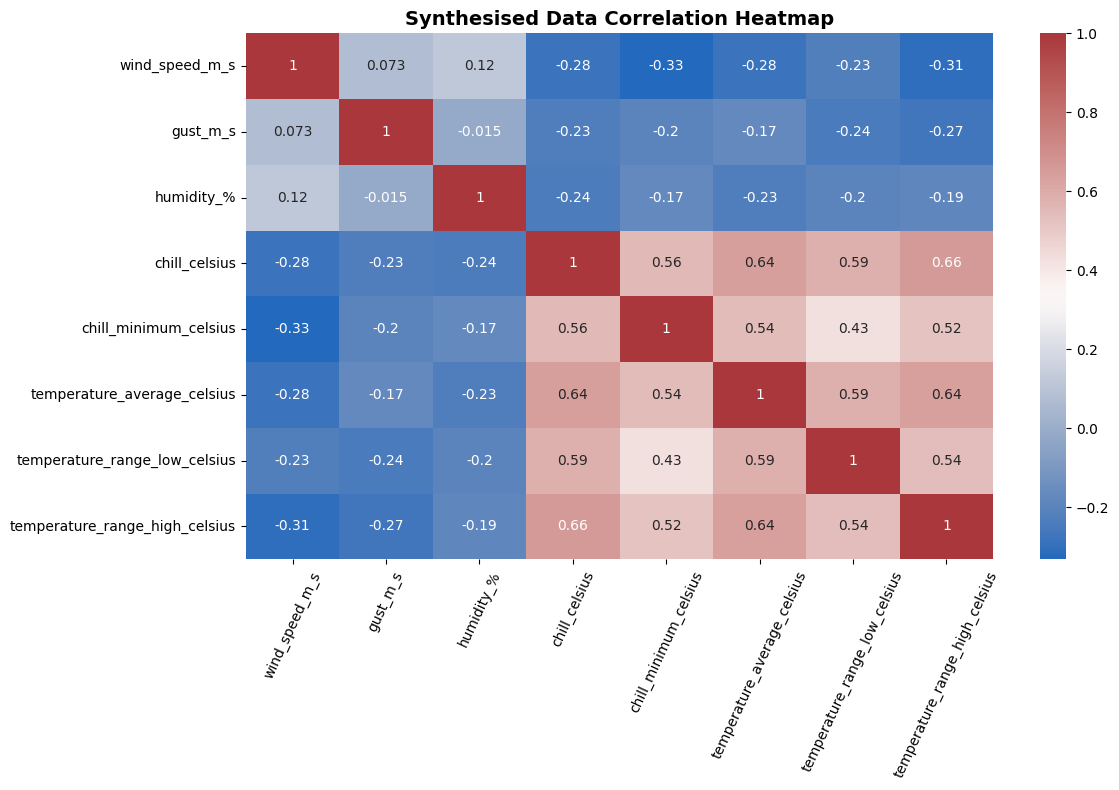

In [106]:
synth_corr_variable = synthesised_dataset.corr(numeric_only=True)

fig, (ax1) = plt.subplots(1,1, figsize=(12, 8))
sns.heatmap(synth_corr_variable, cmap="vlag", ax=ax1, annot = True).set_title('Synthesised Data Correlation Heatmap', color='black', size=14, weight='bold')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 65)
plt.show()

If the relationship between variables has already been modelled it is then possible to predict a variable based on it's relationship with another variable provided that the independent variable has been accurately synthesised. In the case of wind speed, chill and temperature the relationships have been modelled and the values of the dependant variables can be predicted if the independent variables have been modelled accurately.

To investigate if the modelled data is accurate the full year variable histograms can be compared. Though not identical the histograms are close in appearance and this would suggest that the data has been relatively accurately modelled and therefore the dependent variable can be modelled from this data.

[Text(0.5, 0, 'wind_speed_m_s')]

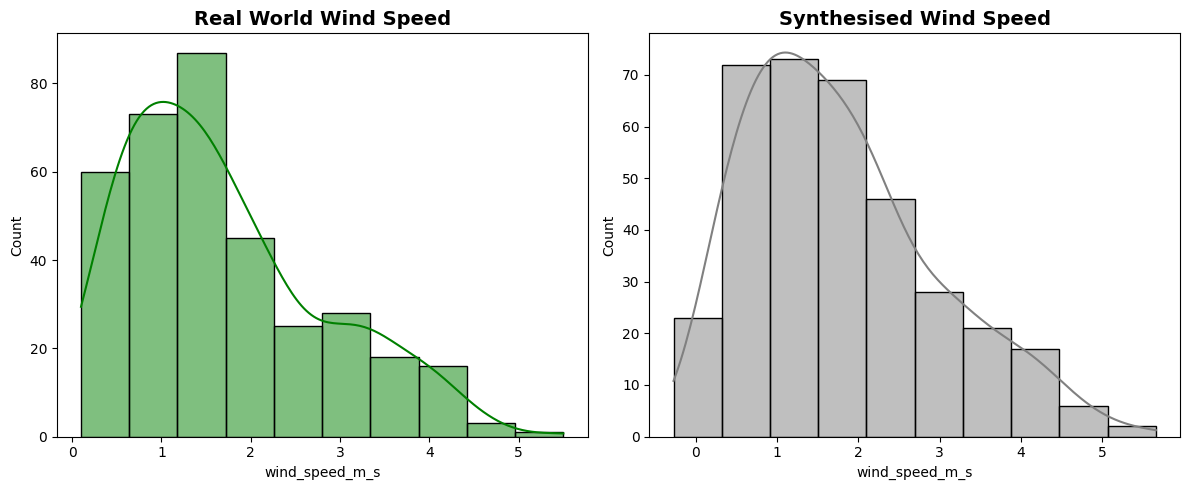

In [107]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(garden_weather['wind_speed_m_s'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Wind Speed', color='black', size=14, weight='bold')
sns.histplot(synthesised_dataset['wind_speed_m_s'], color='grey', kde=True, ax=ax2, bins=10).set_title('Synthesised Wind Speed', color='black', size=14, weight='bold')
ax2.set(xlabel='wind_speed_m_s')

Using linear regression the relationship between wind speed (the independent variable) and gust speed (the dependent variable) can be modelled.

In [108]:
 # the following code has been adapted from here - https://realpython.com/linear-regression-in-python/#simple-linear-regression-with-scikit-learn
# [Accessed 01 Dec. 2023]

from sklearn.linear_model import LinearRegression

# reshape the values of the independent variable
x = g_w['wind_speed_m_s'].values.reshape(-1, 1)

# declare a variable for the dependent variable
y = g_w['gust_m_s'].values

# create the model
model = LinearRegression()

# fit the model
model.fit(x, y)

model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)

# print the r squared value
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")


print(f"slope: {model.coef_}")

new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print(f"intercept: {new_model.intercept_}")


print(f"slope: {new_model.coef_}")

model_x = synthesised_dataset['wind_speed_m_s'].values.reshape(-1, 1)

y_pred = model.predict(model_x)

coefficient of determination: 0.9107598005523367
intercept: 0.8677113840169621
slope: [2.5501901]
intercept: [0.86771138]
slope: [[2.5501901]]


In [109]:
# add the modelled gust speeds to the synthesised dataset
synthesised_dataset['gust_m_s'] = pd.Series(y_pred.reshape(-1)).values

The real world gust speed and the gust speed data that has been modelled based on the linear regression model can be plotted and compared. As has been observed on multiple runs of the model both sets of data are identical. This further validates that the model of the wind speed is accurate.

[Text(0.5, 0, 'gust_m_s')]

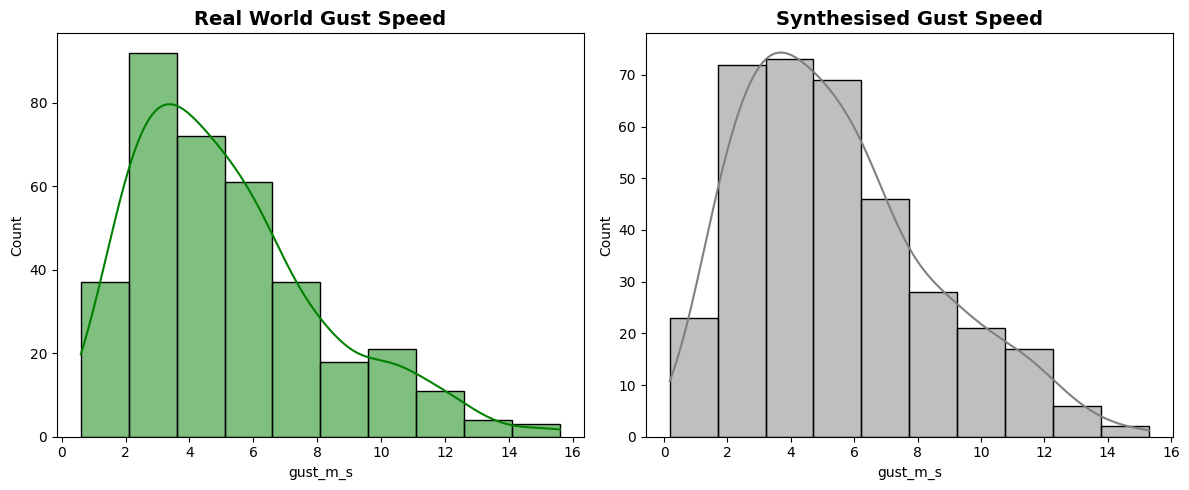

In [110]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(garden_weather['gust_m_s'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Gust Speed', color='black', size=14, weight='bold')
sns.histplot(synthesised_dataset['gust_m_s'], color='grey', kde=True, ax=ax2, bins=10).set_title('Synthesised Gust Speed', color='black', size=14, weight='bold')
ax2.set(xlabel='gust_m_s')

The real world and modelled wind and gust speed trends can be plotted side by side for comparative purposes.

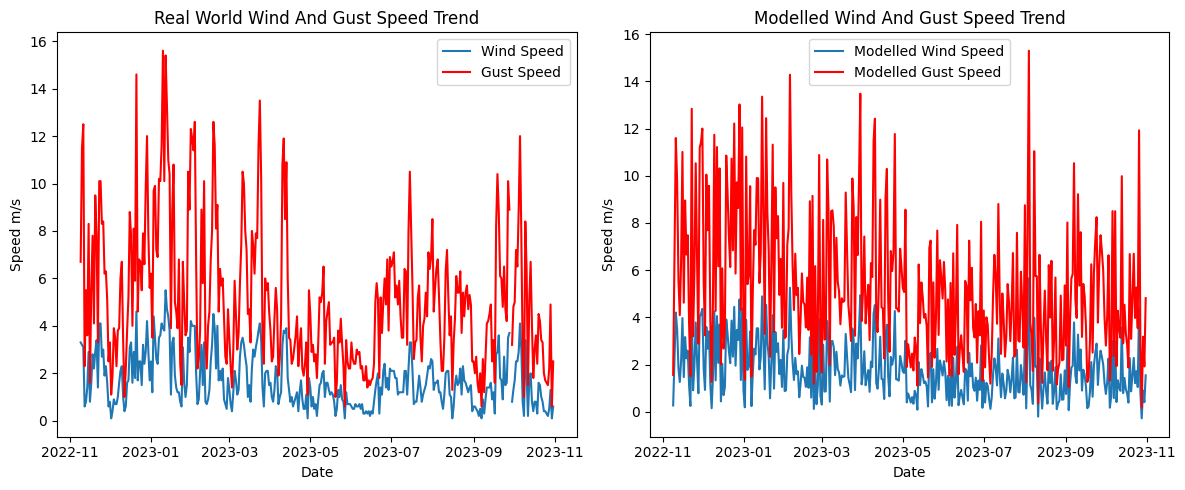

In [111]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.plot(garden_weather['wind_speed_m_s'], label='Wind Speed')
ax1.plot(garden_weather['gust_m_s'], label='Gust Speed', color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Speed m/s')
ax1.legend()
ax1.set_title('Real World Wind And Gust Speed Trend')
ax2.plot(synthesised_dataset['wind_speed_m_s'], label='Modelled Wind Speed')
ax2.plot(synthesised_dataset['gust_m_s'], label='Modelled Gust Speed', color='red')
ax2.set_xlabel('Date')
ax2.set_ylabel('Speed m/s')
ax2.legend()
ax2.set_title('Modelled Wind And Gust Speed Trend')
plt.show()

The same method can be applied to the the relationship between the chill and minimum chill variables.

Firstly the real world and modelled chill data (the independent variable) are plotted to understand if the modelled data is accurate. 

[Text(0.5, 0, 'chill_celsius')]

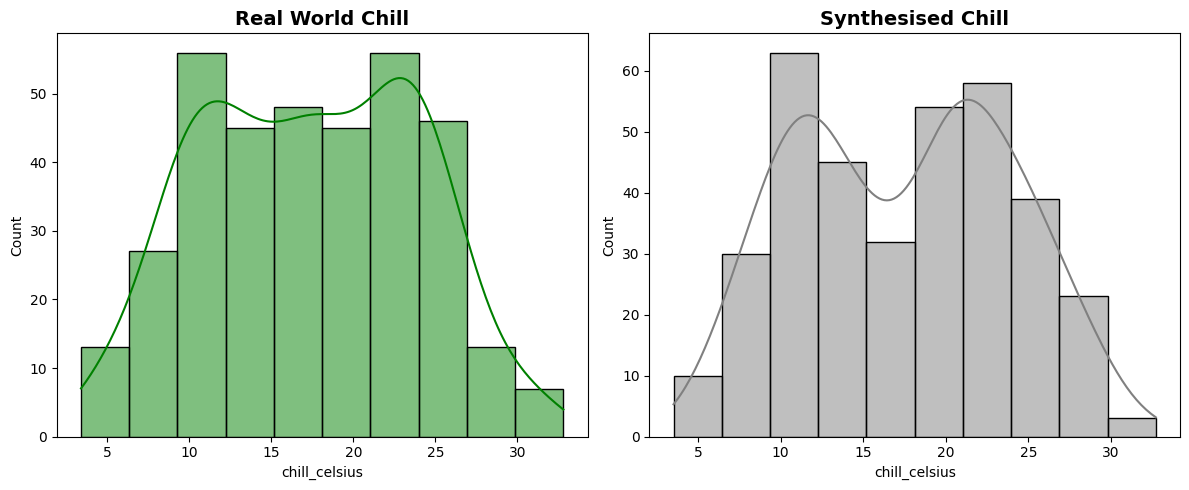

In [112]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(garden_weather['chill_celsius'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Chill', color='black', size=14, weight='bold')
sns.histplot(synthesised_dataset['chill_celsius'], color='grey', kde=True, ax=ax2, bins=10).set_title('Synthesised Chill', color='black', size=14, weight='bold')
ax2.set(xlabel='chill_celsius')

A linear regression model is created to model the relationship between chill (the independent variable) and chill minimum (dependent variable).

In [113]:
# reshape the values of the independent variable
x = g_w['chill_celsius'].values.reshape(-1, 1)
# declare a variable for the 
y = g_w['chill_minimum_celsius'].values

# create the model
model = LinearRegression()
# fit the model
model.fit(x, y)

model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)

# print the r squared value
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"slope: {model.coef_}")

new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print(f"intercept: {new_model.intercept_}")

print(f"slope: {new_model.coef_}")

model_x = synthesised_dataset['chill_celsius'].values.reshape(-1, 1)

y_pred = model.predict(model_x)

coefficient of determination: 0.6749836267761344
intercept: -3.5047338552522636
slope: [0.61392586]
intercept: [-3.50473386]
slope: [[0.61392586]]


In [114]:
# add the modelled gust speeds to the synthesised dataset
synthesised_dataset['chill_minimum_celsius'] = pd.Series(y_pred.reshape(-1)).values

The real world chill minimum and the modelled chill minimum data is plotted to check that the modelled data is accurate.

[Text(0.5, 0, 'chill_minimum_celsius')]

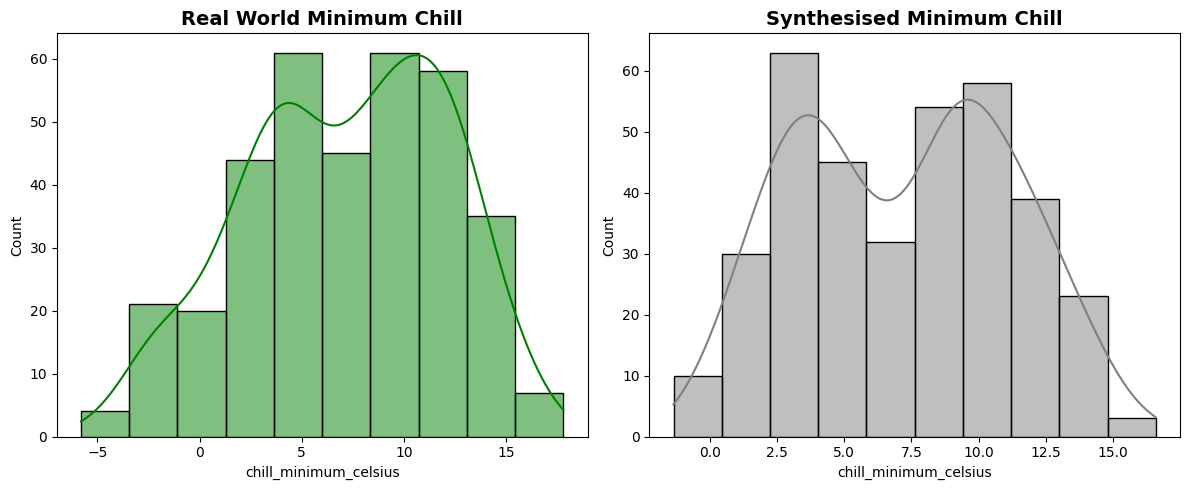

In [115]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(garden_weather['chill_minimum_celsius'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Minimum Chill', color='black', size=14, weight='bold')
sns.histplot(synthesised_dataset['chill_minimum_celsius'], color='grey', kde=True, ax=ax2, bins=10).set_title('Synthesised Minimum Chill', color='black', size=14, weight='bold')
ax2.set(xlabel='chill_minimum_celsius')

The trend plots for the real world and modelled chill and minimum chill data is plotted side by side for comparative purposes.

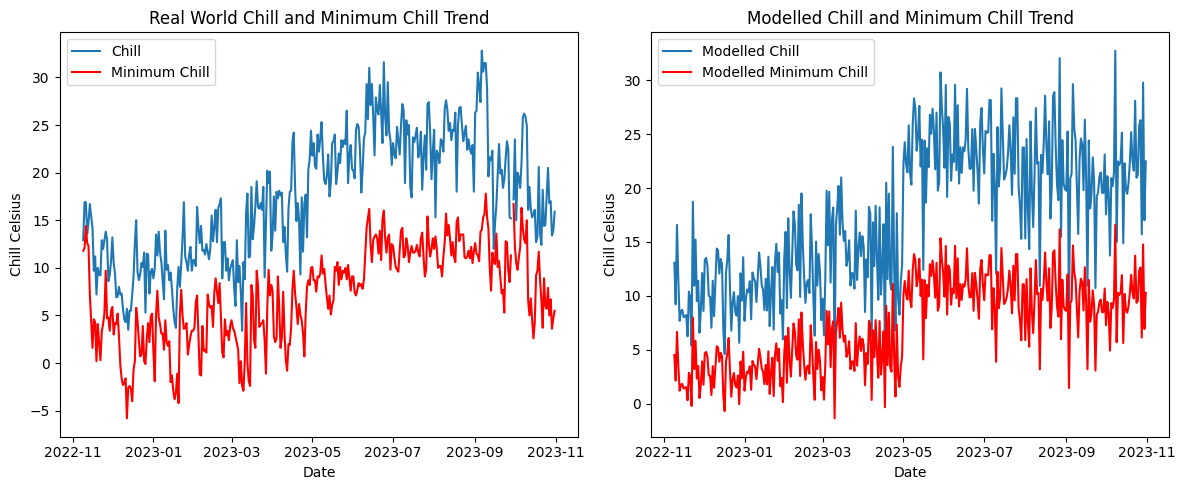

In [116]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.plot(garden_weather['chill_celsius'], label='Chill')
ax1.plot(garden_weather['chill_minimum_celsius'], label='Minimum Chill', color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Chill Celsius')
ax1.legend()
ax1.set_title('Real World Chill and Minimum Chill Trend')
ax2.plot(synthesised_dataset['chill_celsius'], label='Modelled Chill')
ax2.plot(synthesised_dataset['chill_minimum_celsius'], label='Modelled Minimum Chill', color='red')
ax2.set_xlabel('Date')
ax2.set_ylabel('Chill Celsius')
ax2.legend()
ax2.set_title('Modelled Chill and Minimum Chill Trend')
plt.show()

Modelling the relationship between the temperature variables is slightly more complex in so far as there are two independent variables - minimum and low and high. The average temperature is the dependent variable. The synthesised data sets of the two dependent variables are plotted side by side to understand if the models are accurate when compared to the real world data.

[Text(0.5, 0, 'temperature_celsius')]

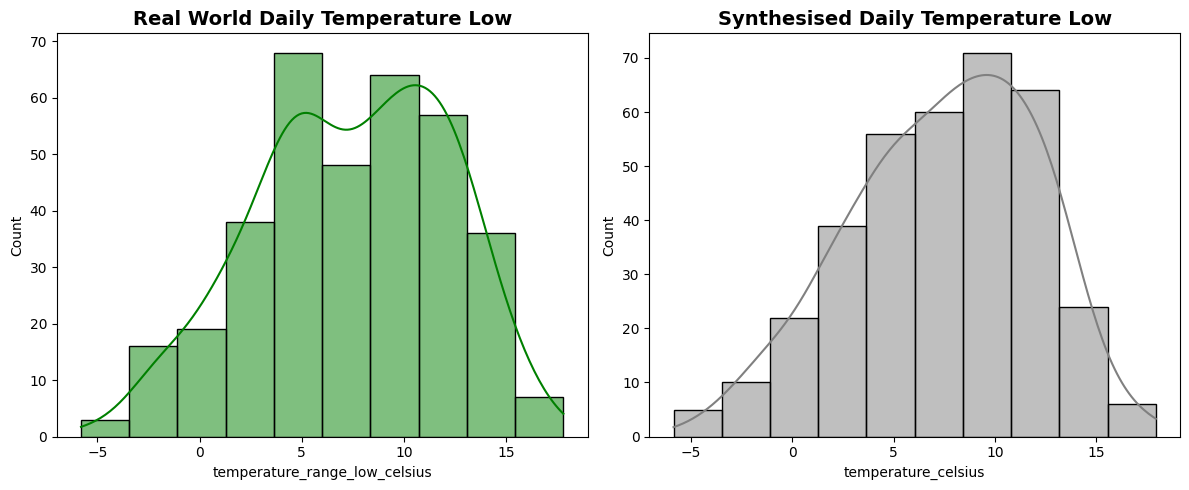

In [126]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(garden_weather['temperature_range_low_celsius'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Daily Temperature Low', color='black', size=14, weight='bold')
sns.histplot(synthesised_dataset['temperature_range_low_celsius'], color='grey', kde=True, ax=ax2, bins=10).set_title('Synthesised Daily Temperature Low', color='black', size=14, weight='bold')
ax2.set(xlabel='temperature_celsius')

[Text(0.5, 0, 'temperature_celsius')]

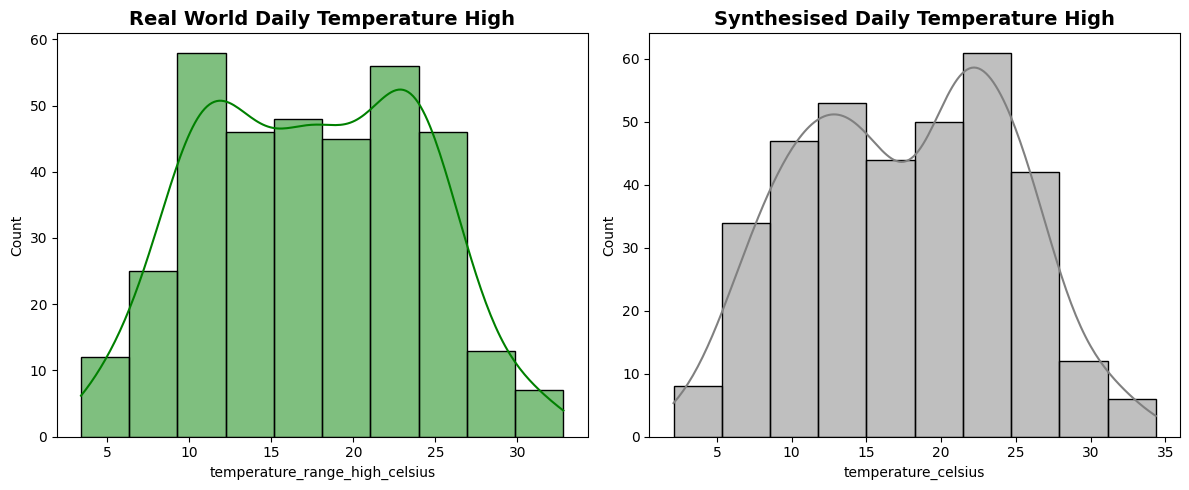

In [127]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(garden_weather['temperature_range_high_celsius'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Daily Temperature High', color='black', size=14, weight='bold')
sns.histplot(synthesised_dataset['temperature_range_high_celsius'], color='grey', kde=True, ax=ax2, bins=10).set_title('Synthesised Daily Temperature High', color='black', size=14, weight='bold')
ax2.set(xlabel='temperature_celsius')

Create the multiple regression model based on the real world data relationships between the variables.

In [131]:
# reshape the values of the independent variable
x = g_w[['temperature_range_low_celsius', 'temperature_range_high_celsius']].values
# declare a variable for the 
y = g_w['temperature_average_celsius'].values

# create the model
model = LinearRegression()
# fit the model
model.fit(x, y)

model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)

# print the r squared value
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"slope: {model.coef_}")

new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print(f"intercept: {new_model.intercept_}")

print(f"slope: {new_model.coef_}")

model_x = synthesised_dataset[['temperature_range_low_celsius', 'temperature_range_high_celsius']].values

y_pred = model.predict(model_x)

coefficient of determination: 0.9761857306931297
intercept: 0.07704058566295657
slope: [0.53237697 0.43275659]
intercept: [0.07704059]
slope: [[0.53237697 0.43275659]]


In [132]:
# add the modelled gust speeds to the synthesised dataset
synthesised_dataset['temperature_average_celsius'] = pd.Series(y_pred).values

Plotting the real world average temperature side by side with the modelled dataset allows the accuracy of the modelled data to be checked.

[Text(0.5, 0, 'temperature_celsius')]

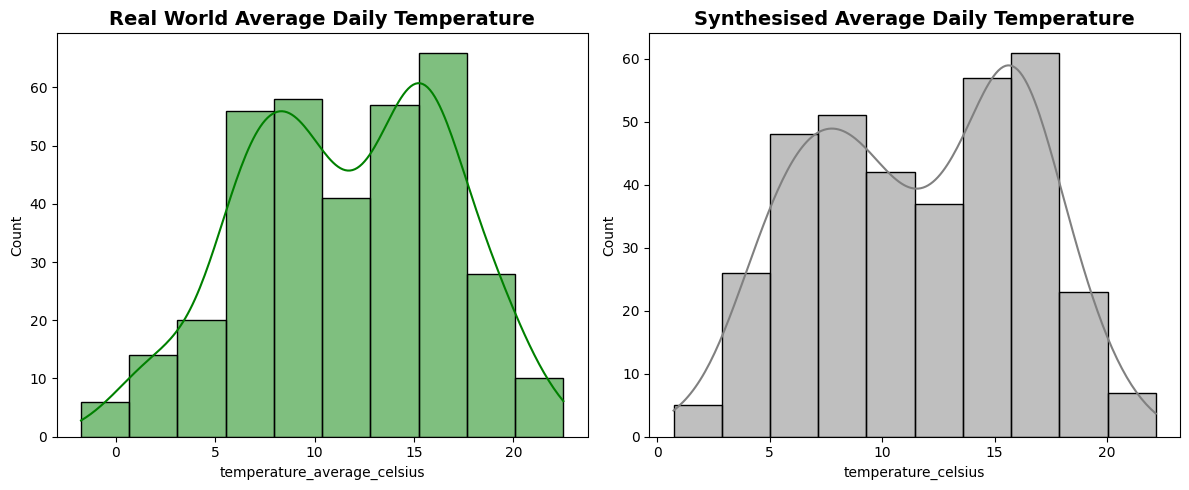

In [134]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(garden_weather['temperature_average_celsius'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Average Daily Temperature', color='black', size=14, weight='bold')
sns.histplot(synthesised_dataset['temperature_average_celsius'], color='grey', kde=True, ax=ax2, bins=10).set_title('Synthesised Average Daily Temperature', color='black', size=14, weight='bold')
ax2.set(xlabel='temperature_celsius')

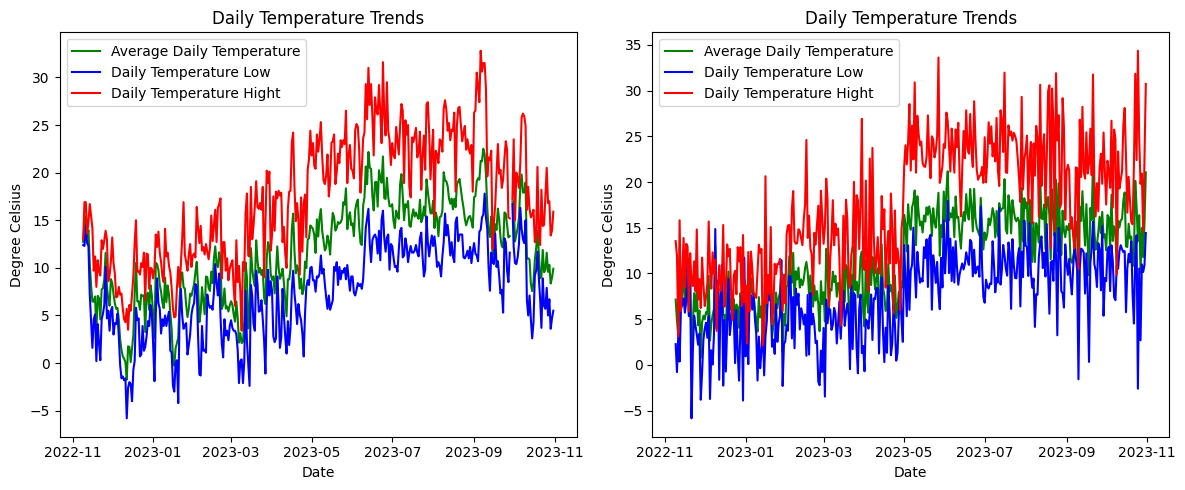

In [135]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.plot(garden_weather['temperature_average_celsius'], label='Average Daily Temperature', color='green')
ax1.plot(garden_weather['temperature_range_low_celsius'], label='Daily Temperature Low', color='blue')
ax1.plot(garden_weather['temperature_range_high_celsius'], label='Daily Temperature Hight', color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Degree Celsius')
ax1.legend()
ax1.set_title('Daily Temperature Trends')
ax2.plot(synthesised_dataset['temperature_average_celsius'], label='Average Daily Temperature', color='green')
ax2.plot(synthesised_dataset['temperature_range_low_celsius'], label='Daily Temperature Low', color='blue')
ax2.plot(synthesised_dataset['temperature_range_high_celsius'], label='Daily Temperature Hight', color='red')
ax2.set_xlabel('Date')
ax2.set_ylabel('Degree Celsius')
ax2.legend()
ax2.set_title('Daily Temperature Trends')
plt.show()


---

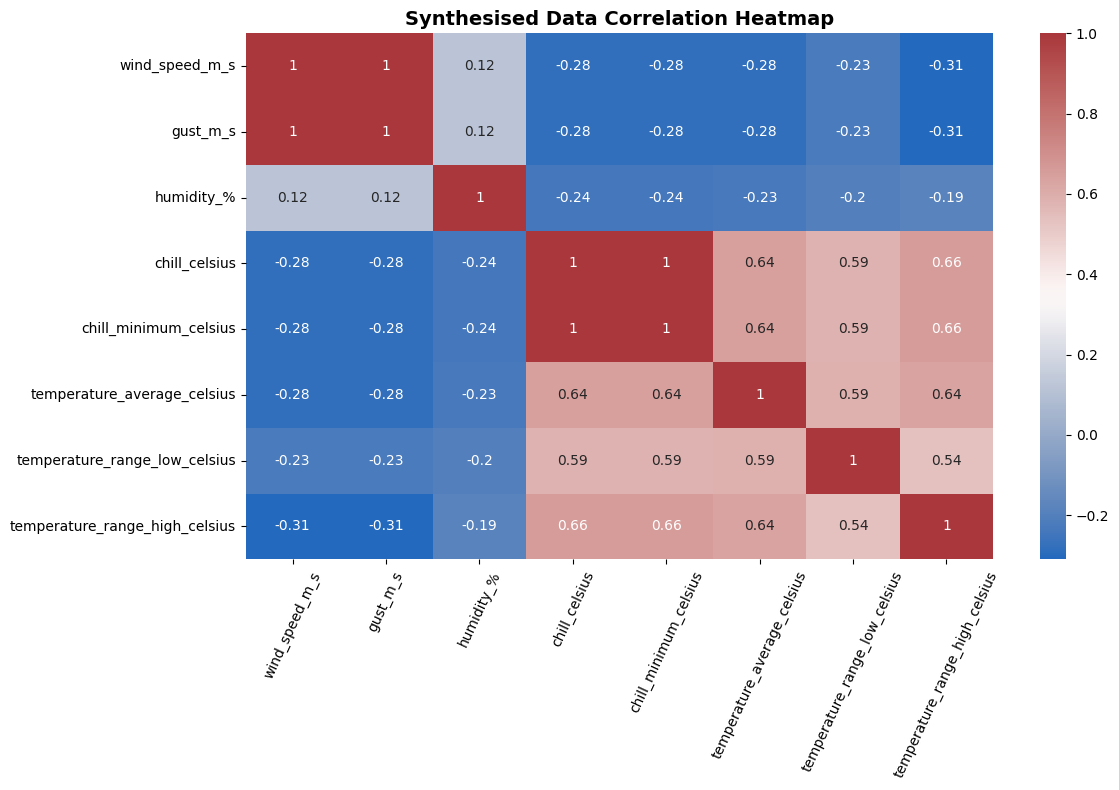

In [117]:
fig, (ax1) = plt.subplots(1,1, figsize=(12, 8))
sns.heatmap(synthesised_dataset.corr(numeric_only=True) , cmap="vlag", ax=ax1, annot = True).set_title('Synthesised Data Correlation Heatmap', color='black', size=14, weight='bold')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 65)
plt.show()

A CSV file of the synthesised data is saved to the datasets folder in the repository.

In [118]:
filepath = Path('datasets/synthesised_dataset.csv')
synthesised_dataset.to_csv(filepath)

---

Section

----

Correlation can also be visualised by using the pairplot function in Seaborn (www.pluralsight.com, n.d.).

In [119]:
# add a season column to the dataset 
synthesised_dataset['season'] = ''

In [120]:
# add the season to the correspoding rows in the dataset
synthesised_dataset.iloc[0:winter_rows, -1] = 'winter'
synthesised_dataset.iloc[winter_rows:(winter_rows + spring_rows), -1] = 'spring'
synthesised_dataset.iloc[winter_rows + spring_rows:winter_rows + spring_rows + summer_rows, -1] = 'summer'
synthesised_dataset.iloc[winter_rows + spring_rows + summer_rows:winter_rows + spring_rows + summer_rows+autumn_rows, -1] = 'autumn'

Text(0.5, 1, 'Real Data Pairplots')

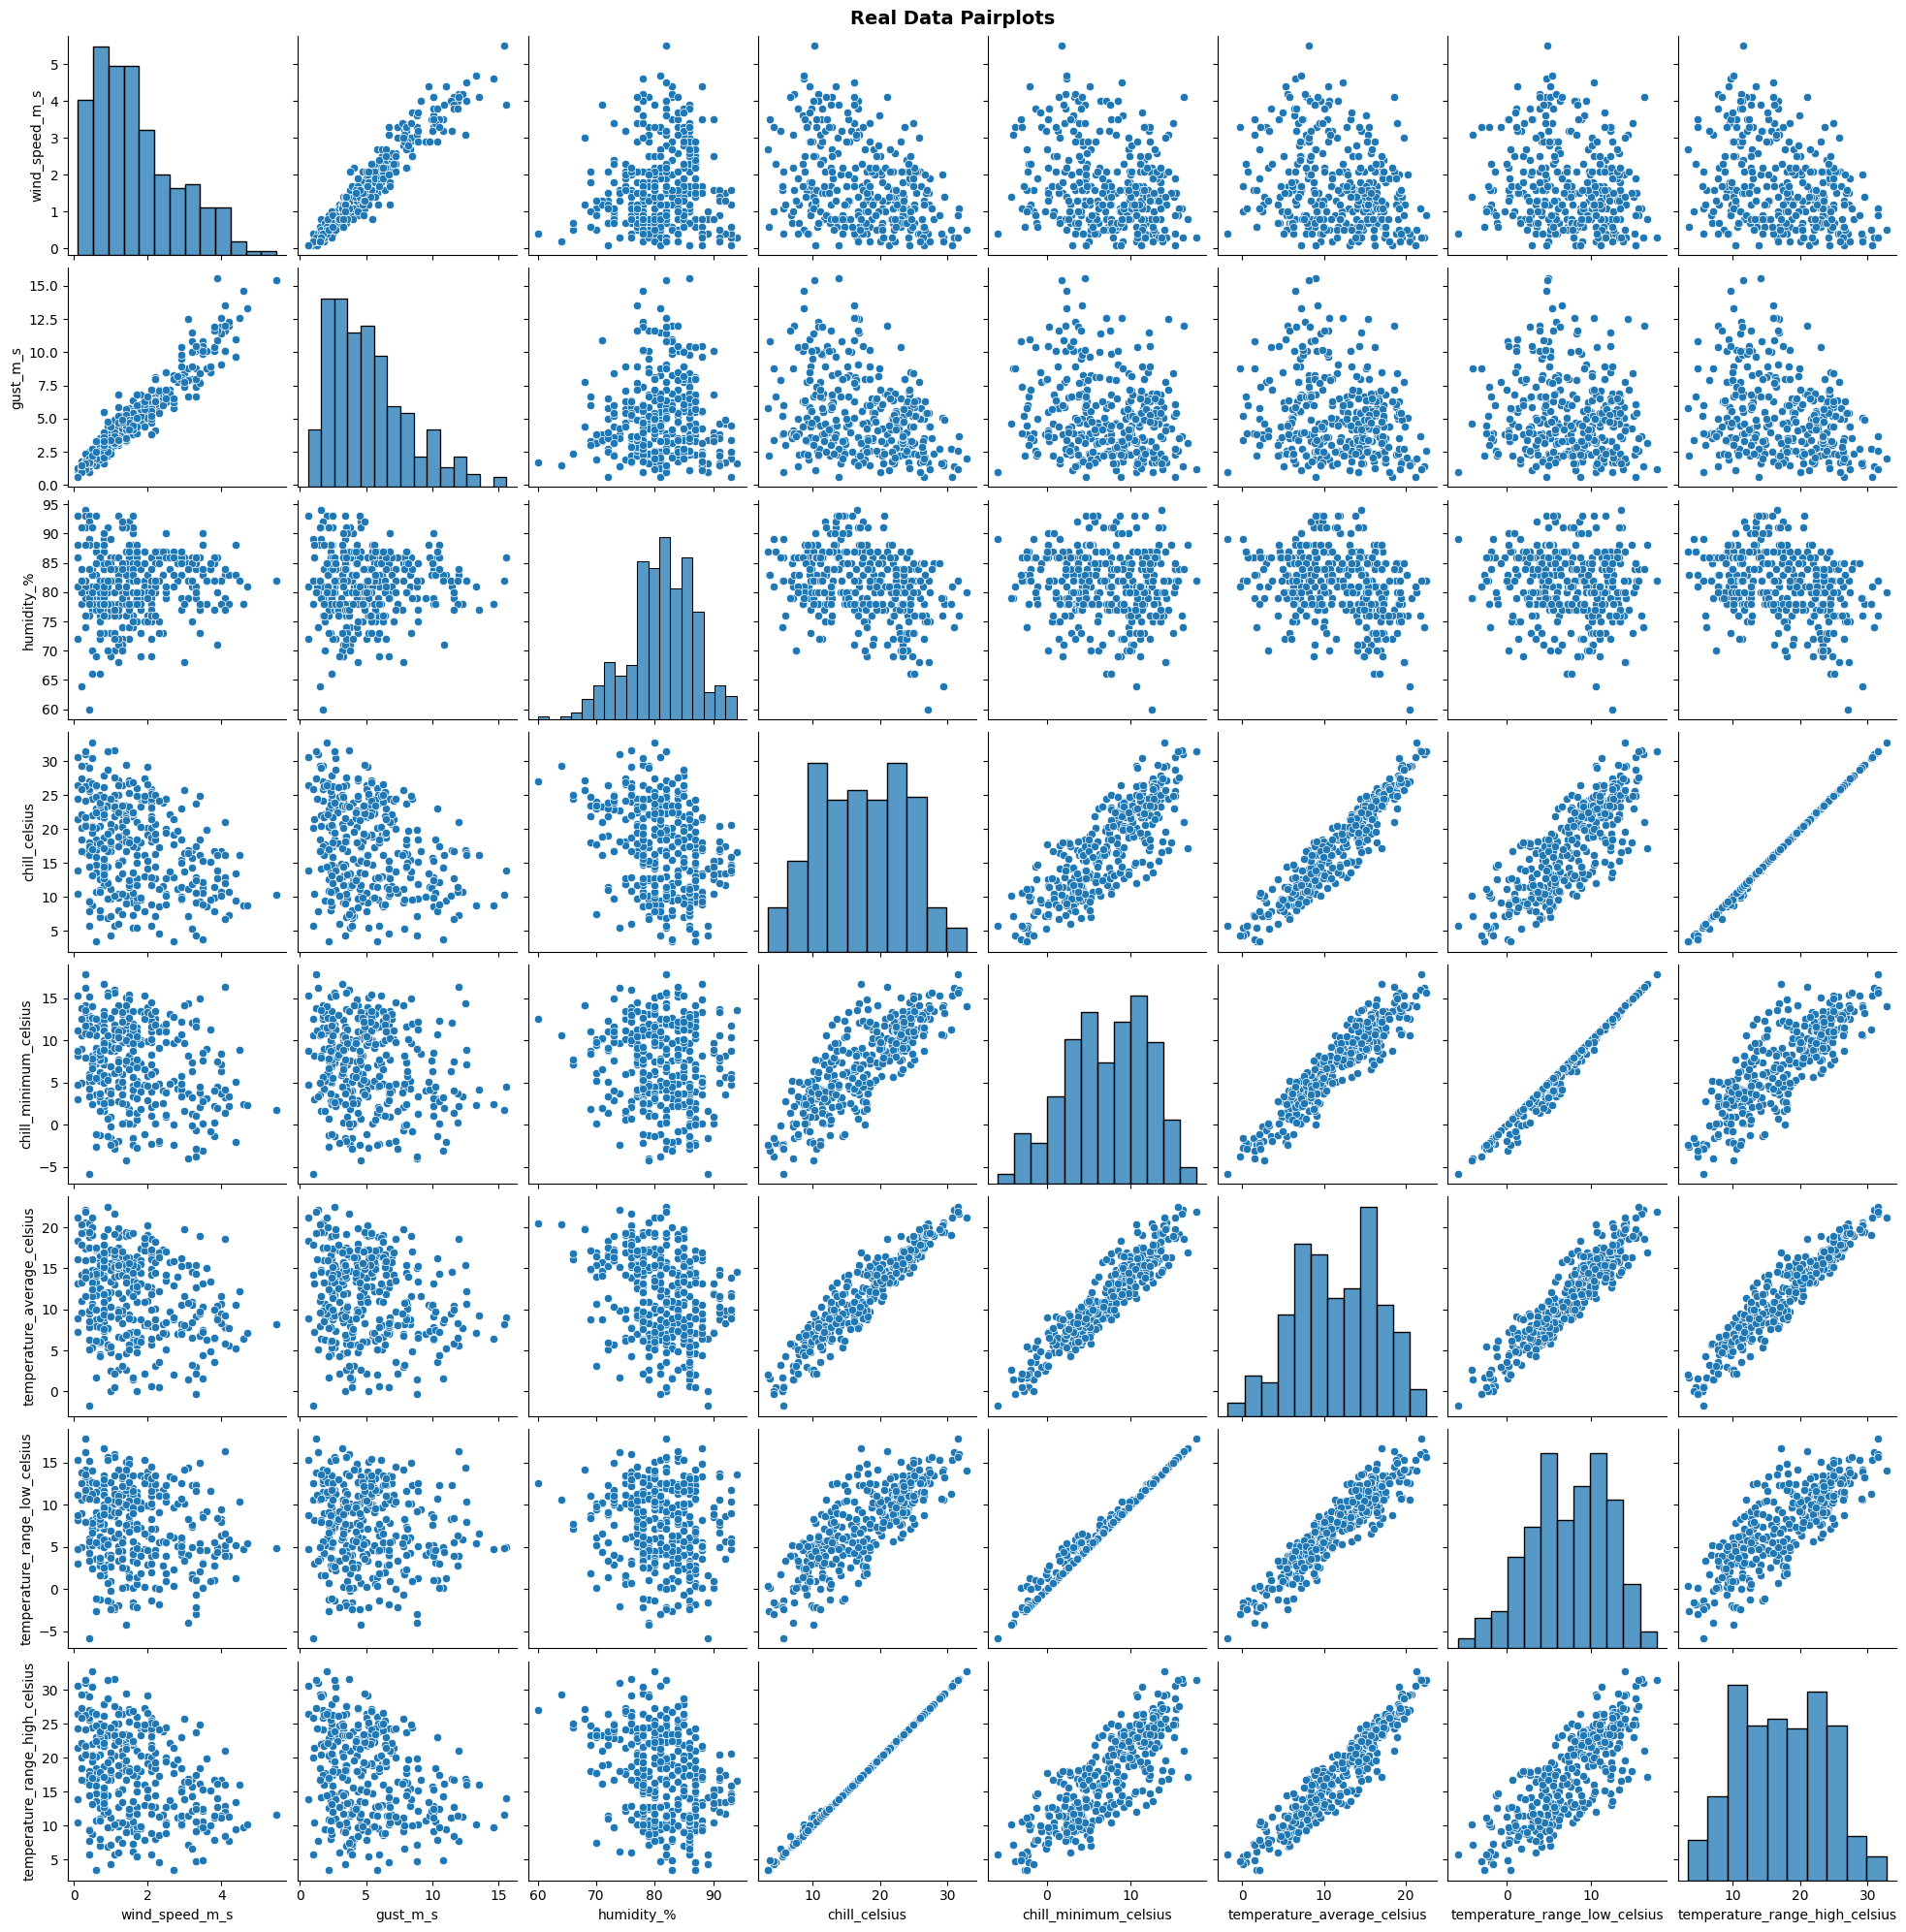

In [121]:
plt.rcParams["figure.autolayout"] = True
sns.pairplot(garden_weather, kind='scatter', markers=["p", "v", "s", "D"])
plt.suptitle('Real Data Pairplots', color='black', size=14, weight='bold', y=1)

Text(0.5, 1, 'Synthesised Data Pairplots')

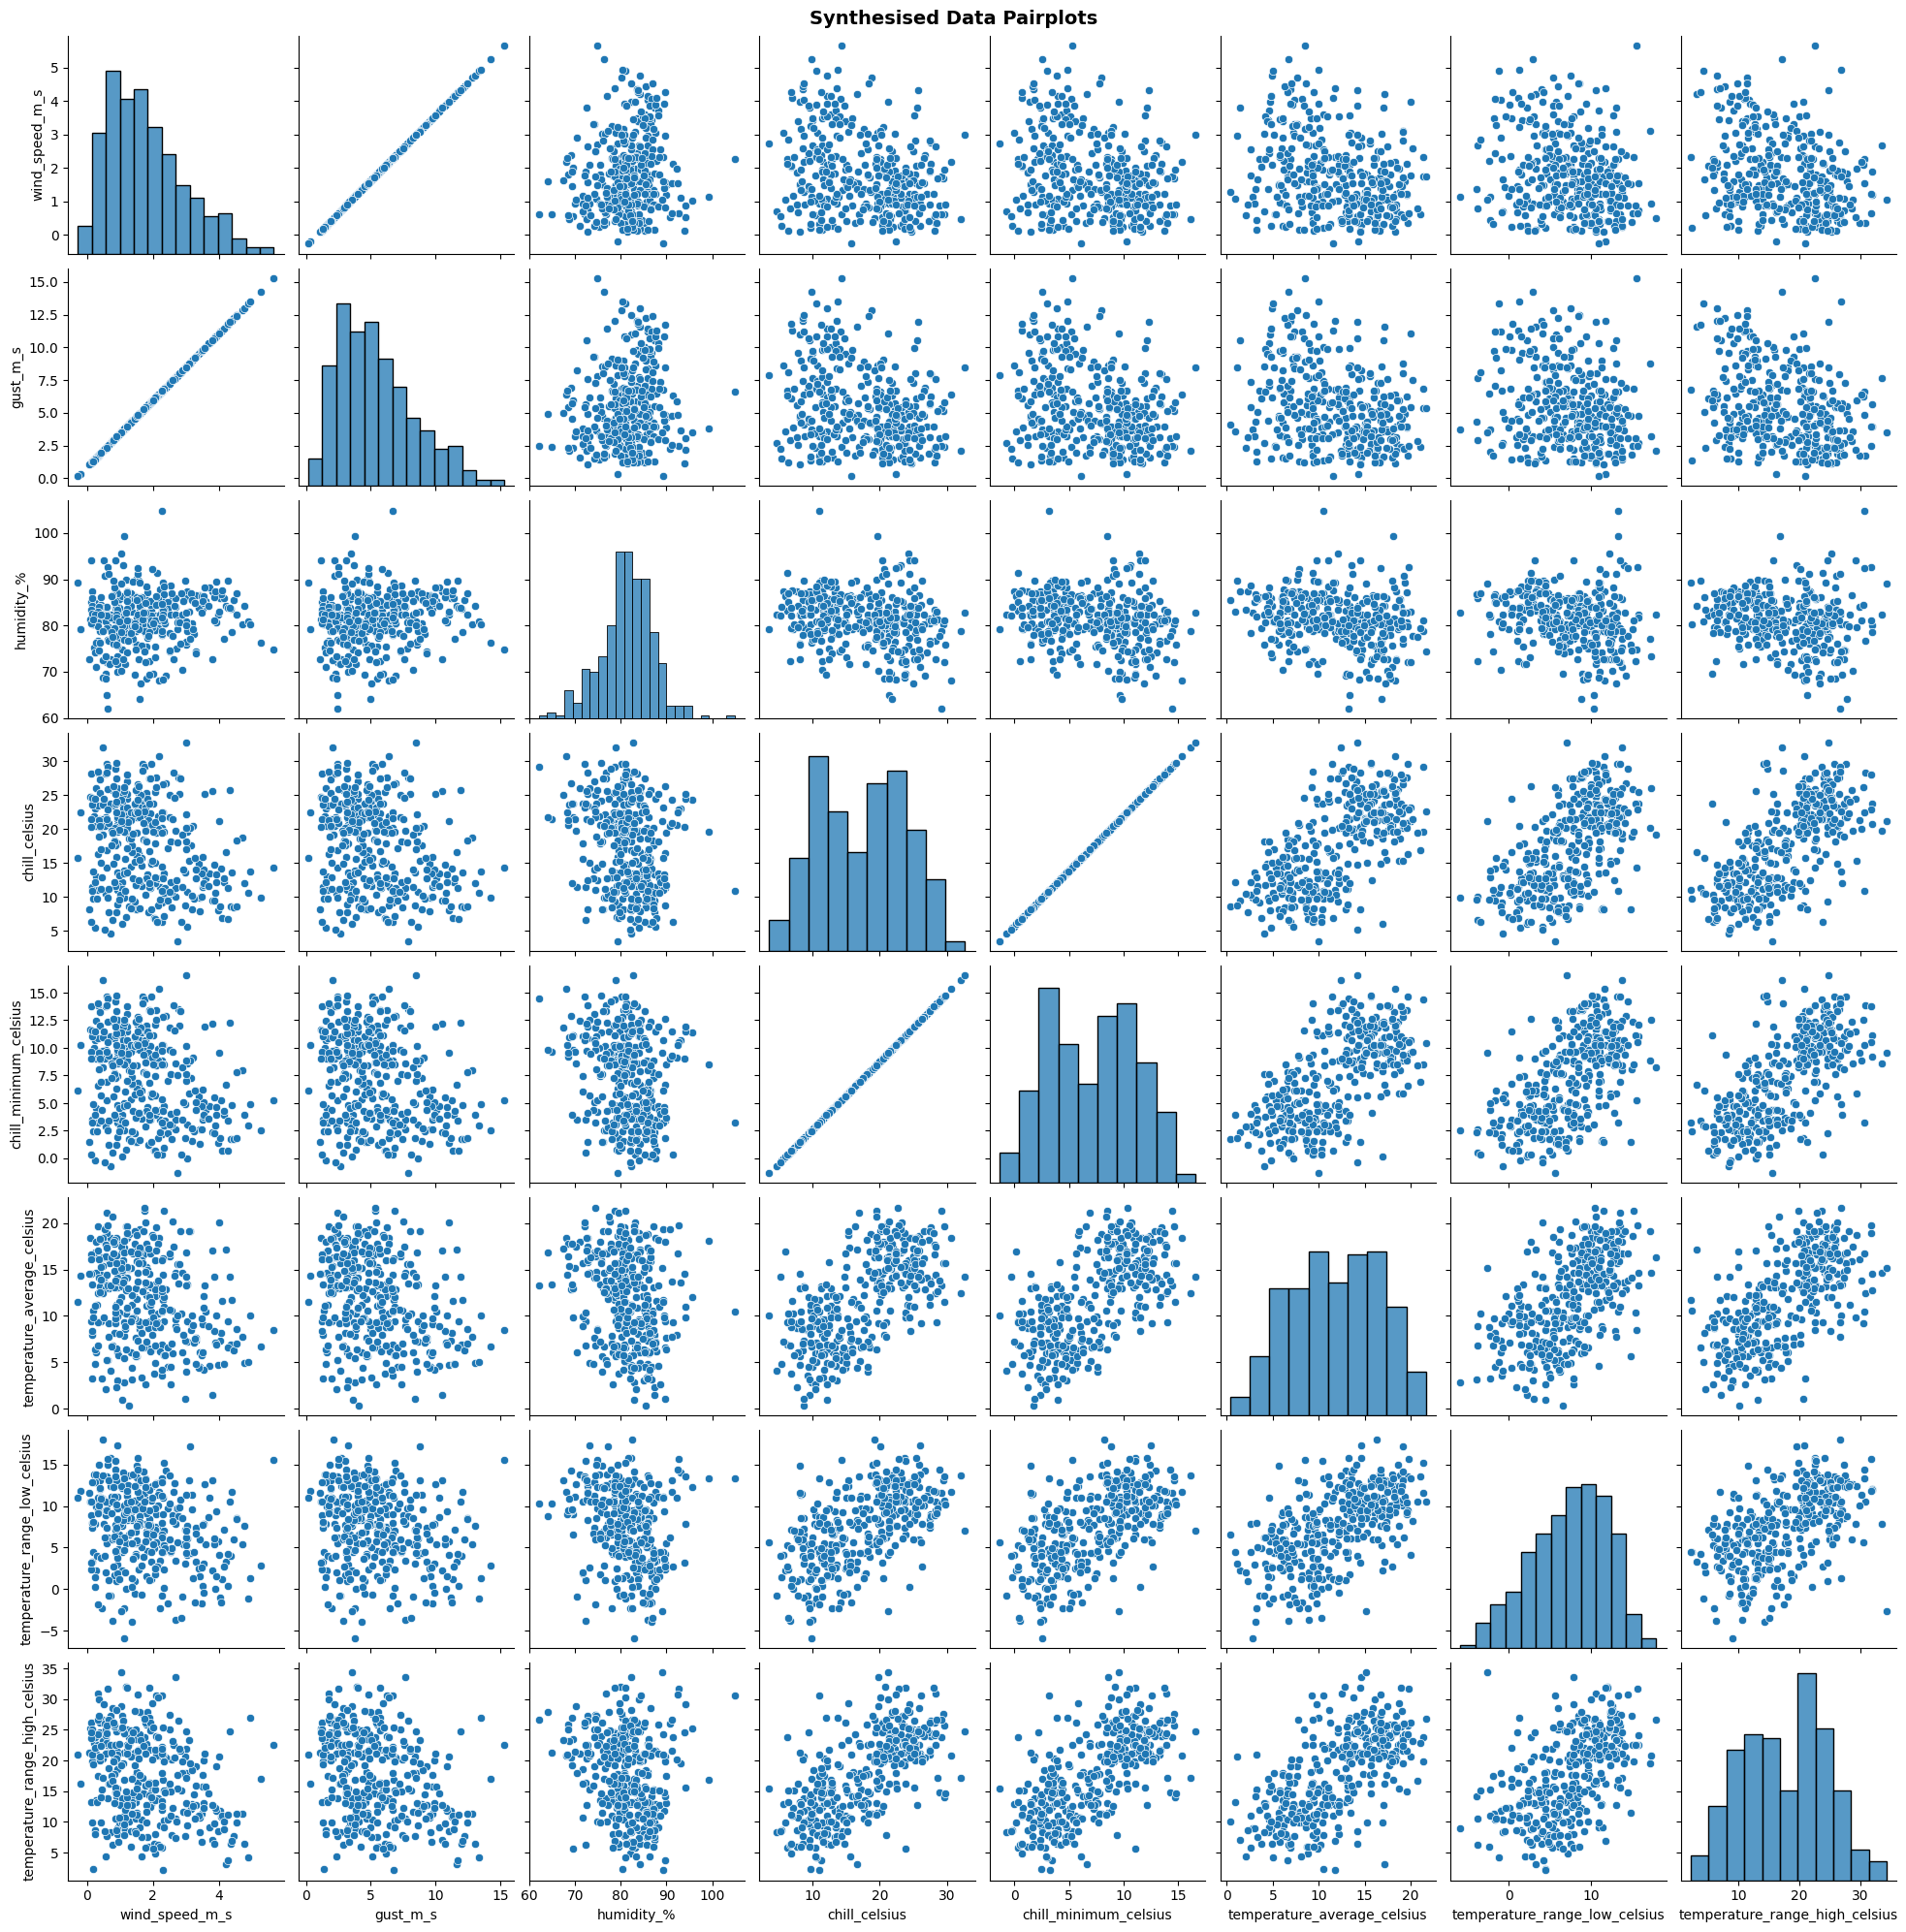

In [122]:
plt.rcParams["figure.autolayout"] = True
sns.pairplot(synthesised_dataset, kind='scatter', diag_kind='hist', markers=["p", "v", "s", "D"])
plt.suptitle('Synthesised Data Pairplots', color='black', size=14, weight='bold', y=1)

By adding the season as a categorical variable to the dataset the pairplots become easier to read. Due to the large number of variables in the dataset one can find it hard to focus on areas where variables have a correlation. One example where it 

In [123]:
# add a season column to the dataset 
synthesised_dataset['season'] = ''

In [124]:
# add the season to the corresponding rows in the dataset
synthesised_dataset.iloc[0:winter_rows, -1] = 'winter'
synthesised_dataset.iloc[winter_rows:(winter_rows + spring_rows), -1] = 'spring'
synthesised_dataset.iloc[winter_rows + spring_rows:winter_rows + spring_rows + summer_rows, -1] = 'summer'
synthesised_dataset.iloc[winter_rows + spring_rows + summer_rows:winter_rows + spring_rows + summer_rows+autumn_rows, -1] = 'autumn'

Text(0.5, 1, 'Synthesised Data Seasonal Pairplots')

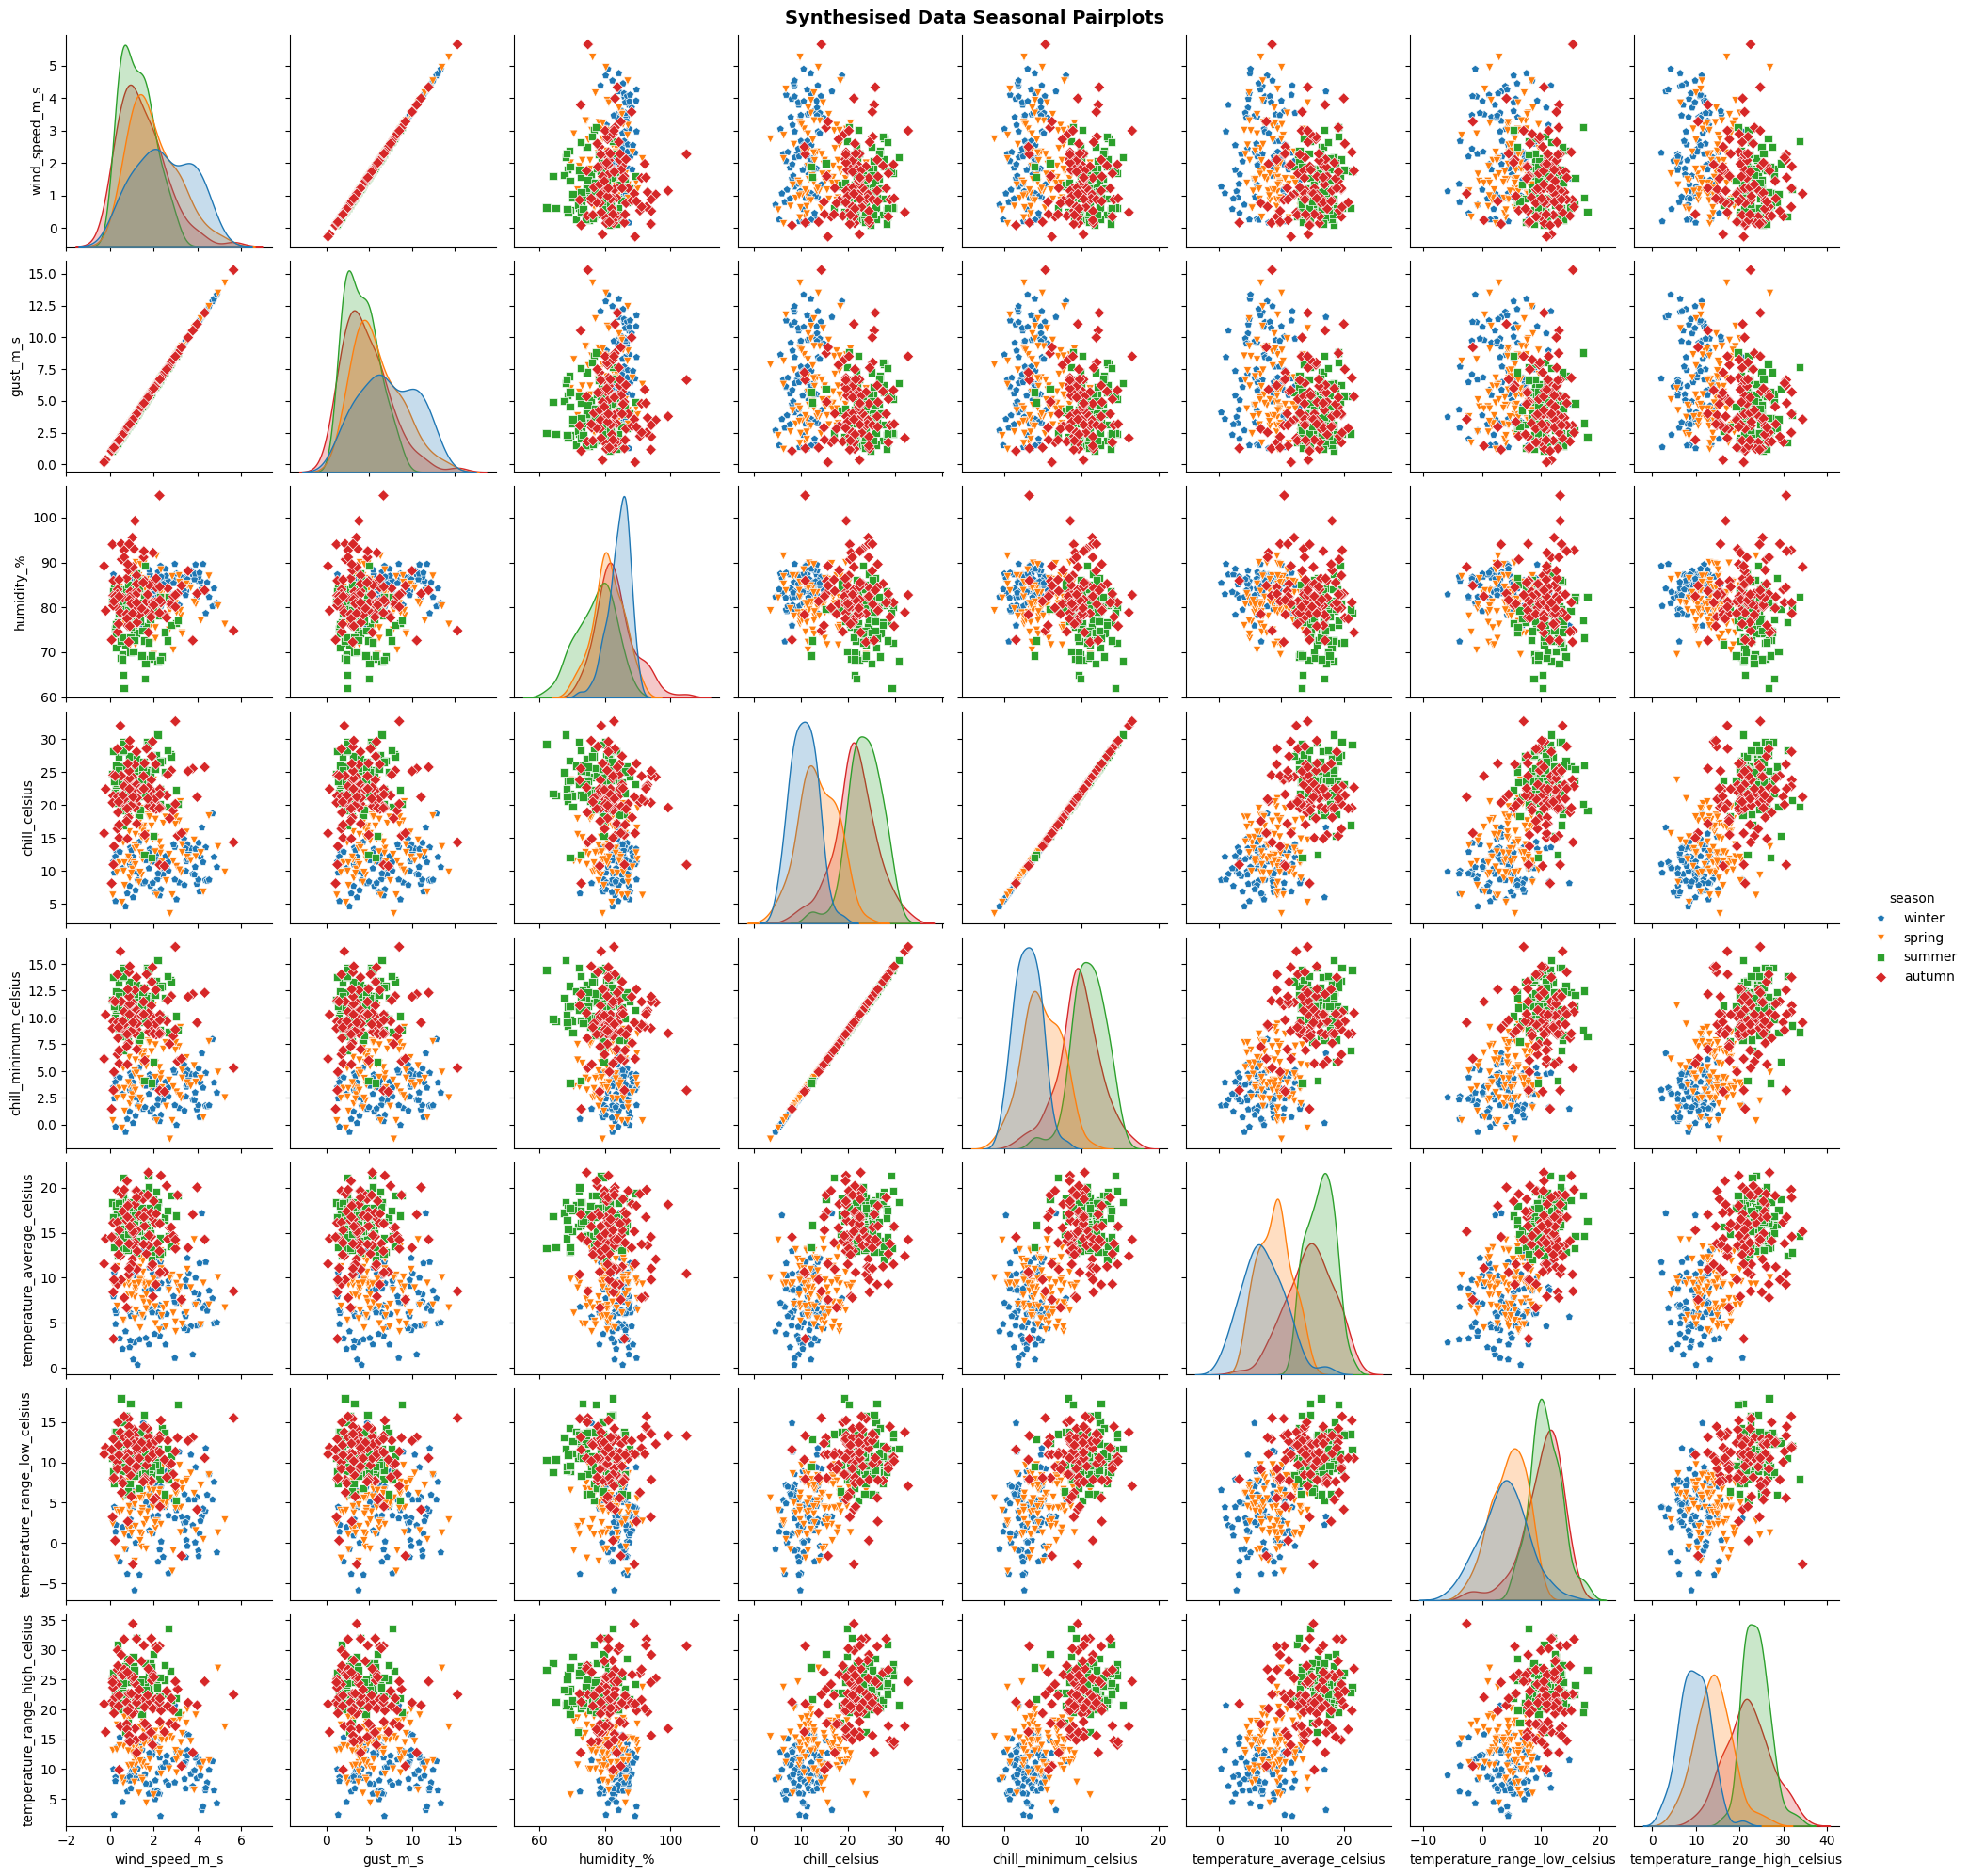

In [125]:
plt.rcParams["figure.autolayout"] = True
sns.pairplot(synthesised_dataset, kind='scatter', hue='season', markers=["p", "v", "s", "D"])
plt.suptitle('Synthesised Data Seasonal Pairplots', color='black', size=14, weight='bold', y=1)

---

## Conclusions <a id="conclusions"></a>

+ Real world data can be explored and visualised using python and freely available software libraries built for statistical analysis.

+ Real world data can be synthesised using the appropriate probability distributions.

+ Researching academic literature will give an insight into the probability distributions used to model variables.

+ A one size fits all approach to probability distribution fitting may not be the best approach. A variable may have to be broken down in to smaller sections and multiple models used to accurately model a variable. In the example explored in this notebook variables were explored over a seasonal time period. Because of the poor fit of some of the distribution models it is possible that a more accurate model could have been synthesised if the variables were analysed on a monthly basis as opposed to a seasonal basis. Given the time available and the large number of variables in the dataset this approach was not practical.

+ Making assumptions about the best fit probability distribution based on a subjective analysis is not the best approach as it may lead to inaccurate data synthesis.

+ Applying a methodology such as the Kolmogorov-Smirnov test is a more scientific approach to best fit probability distribution selection.

+ The presence of a categorical variable in a dataset can help understand correlation between variables.

---

## References <a id="references"></a>

Air Pressure. (n.d.). Available at: https://www.weather.gov/media/zhu/ZHU_Training_Page/winds/pressure_winds/pressure_winds.pdf. [Accessed 28 Nov. 2023].

Arize AI. (n.d.). Kolmogorov Smirnov Test: When and Where To Use It. [online] Available at: https://arize.com/blog-course/kolmogorov-smirnov-test/. [Accessed 29 Nov. 2023].

Asseng S, Foster I, Turner NC (2011) The impact of temperature variability on wheat yields. Glob Change Biol 17(2):997–1012. https://​doi.​org/​10.​1111/j.​1365-​2486.​2010.​02262.x

Bhandari, P. (2020). Levels of Measurement | Nominal, Ordinal, Interval and Ratio. [online] Scribbr. Available at: https://www.scribbr.com/statistics/levels-of-measurement/. [Accessed 7 Nov. 2023].

Chartio. (n.d.). How to Check If Any Value is NaN in a Pandas DataFrame. [online] Available at: https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/. [Accessed 7 Nov. 2023].

Chen, J. (2021). Normal Distribution. [online] Investopedia. Available at: https://www.investopedia.com/terms/n/normaldistribution.asp. [Accessed 10 Nov. 2023].

Cooper, N.W., Dossman, B.C., Berrigan, L.E., J. Morgan Brown, Cormier, D.A., Bégin-Marchand, C., Rodewald, A.D., Taylor, P.D., Tremblay, J.A. and Marra, P.P. (2023). Atmospheric pressure predicts probability of departure for migratory songbirds. 11(1). doi:https://doi.org/10.1186/s40462-022-00356-z.

datatofish.com. (n.d.). How to Create a Correlation Matrix using Pandas - Data to Fish. [online] Available at: https://datatofish.com/correlation-matrix-pandas/. [Accessed 27 Nov. 2023].

docs.python.org. (n.d.). 15. Floating Point Arithmetic: Issues and Limitations — Python 3.10.1 documentation. [online] Available at: https://docs.python.org/3/tutorial/floatingpoint.html. [Accessed 7 Nov. 2023].

GeeksforGeeks. (2018). How to rename columns in Pandas DataFrame. [online] Available at: https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/. [Accessed 7 Nov. 2023].

Gubler, S., Fukutome, S. and Scherrer, S.C. (2023). On the statistical distribution of temperature and the classification of extreme events considering season and climate change—an application in Switzerland. Theoretical and Applied Climatology, 153(3-4), pp.1273–1291. doi:https://doi.org/10.1007/s00704-023-04530-0.

Harmel RD, Richardson CW, Hanson CL, Johnson GL (2002) Evaluating the adequacy of simulating maximum and minimum daily air temperature with the normal distribution. J Appl Meteorol 41(7):744–753. https://doi.org/10.1175/1520-0450(2002)041%3c0744:ETAOSM%3e2.0.CO;2

IBM (n.d.). About Linear Regression | IBM. [online] www.ibm.com. Available at: https://www.ibm.com/topics/linear-regression. [Accessed 01 Dec. 2023].

H, S. (2023). head () and tail () Functions Explained with Examples and Codes. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2023/07/head-and-tail-functions/. [Accessed 7 Nov. 2023].

Kjellstrom T, Holmer I, Lemke B (2009) Workplace heat stress, health and productivity – an increasing challenge for low and middleincome countries during climate change. Glob Health Action 2:1–3. https://​doi.​org/​10.​3402/​gha.​v2i0.​2047

Kumar, S. (2021). Deep Dive Analysis of Missing Values in Dataset. [online] Medium. Available at: https://towardsdatascience.com/deep-dive-analysis-of-missing-values-in-dataset-b387d9de6d4b. [Accessed 7 Nov. 2023].

Malli (2022). How To Concatenate NumPy Arrays. [online] Spark By {Examples}. Available at: https://sparkbyexamples.com/python/numpy-concatenate-arrays/. [Accessed 13 Nov. 2023].

Moffitt, C. (2018). Overview of Pandas Data Types - Practical Business Python. [online] pbpython.com. Available at: https://pbpython.com/pandas_dtypes.html. [Accessed 6 Nov. 2023].

Musa Esıt (2022). The Determination of the Most Appropriate Probability Distribution Models for the Meteorological Variables. Bitlis Eren üniversitesi fen bilimleri dergisi, 11(4), pp.1026–1041. doi:https://doi.org/10.17798/bitlisfen.1168077. [Accessed 10 Nov. 2023].

Name, Y. (2022). Pandas filter dates by month, hour, day and last N days & weeks. [online] kanoki. Available at: https://kanoki.org/2022/07/16/pandas-filter-dates-by-month-hour-day-or-last-n-days-weeks/ [Accessed 9 Nov. 2023].

numpy.org. (n.d.). numpy.random.Generator.rayleigh — NumPy v1.26 Manual. [online] Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.rayleigh.html#numpy.random.Generator.rayleigh [Accessed 10 Nov. 2023].

pandas.pydata.org. (2023). pandas.DataFrame — pandas 1.2.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html. [Accessed 13 Nov. 2023].

pandas.pydata.org. (n.d.). Time series / date functionality — pandas 1.2.3 documentation. [online] Available at: https://pandas.pydata.org/docs/user_guide/timeseries.html. [Accessed 13 Nov. 2023].

Paraschiv, L.-S., Paraschiv, S. and Ion, I.V. (2019). Investigation of wind power density distribution using Rayleigh probability density function. Energy Procedia, 157, pp.1546–1552. doi:https://doi.org/10.1016/j.egypro.2018.11.320. [Accesed 10 Nov. 2023].

Pascual M, Ahumada JA, Chaves LF, Rodó X, Bouma M (2006) Malaria resurgence in the East African highlands: temperature trends revisited, PNAS, April 11 103 (15):5829–5834. https://d​oi.​org/​10.​1073/​pnas.​05089​29103

Python, R. (n.d.). Linear Regression in Python – Real Python. [online] realpython.com. Available at: https://realpython.com/linear-regression-in-python/#simple-linear-regression-with-scikit-learn. [Accessed 01 Dec. 2023].

Ruff TW, Neelin JD (2012) Long tails in regional surface temperature probability distributions with implications for extremes underglobal warming. Geophys Res Lett 39:4704. https://doi.org/10.1029/2011GL050610

Sharma, R. (2020). 4 Types of Data: Nominal, Ordinal, Discrete, Continuous. [online] upGrad blog. Available at: https://www.upgrad.com/blog/types-of-data/. [Accessed 7 Nov. 2023].

Stack Overflow. (n.d.). How do I properly set the Datetimeindex for a Pandas datetime object in a dataframe? [online] Available at: https://stackoverflow.com/questions/27032052/how-do-i-properly-set-the-datetimeindex-for-a-pandas-datetime-object-in-a-datafr [Accessed 7 Nov. 2023].

Stack Overflow. (n.d.). How to find probability distribution and parameters for real data? (Python 3). [online] Available at: https://stackoverflow.com/questions/37487830/how-to-find-probability-distribution-and-parameters-for-real-data-python-3 [Accessed 16 Nov. 2023].

Stack Overflow. (n.d.). python: rayleigh fit (histogram). [online] Available at: https://stackoverflow.com/questions/63637144/python-rayleigh-fit-histogram [Accessed 15 Nov. 2023].

Tamboli, N. (2021). Tackling Missing Value in Dataset. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/. [Accessed 7 Nov. 2023].

Treadwell, M. (2014). Tableau Pills: Continuous and Discrete Data Roles. [online] InterWorks. Available at: https://interworks.com/blog/mtreadwell/2014/02/19/tableau-pills-continuous-and-discrete-data-roles/ [Accessed 7 Nov. 2023].

UCAR (2019). The Highs and Lows of Air Pressure | UCAR Center for Science Education. [online] Ucar.edu. Available at: https://scied.ucar.edu/learning-zone/how-weather-works/highs-and-lows-air-pressure. [Accessed 01 Dec. 2023].

Walker, J. (2019). Tutorial: Time Series Analysis with Pandas – Dataquest. [online] Dataquest. Available at: https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/. [Accessed 7 Nov. 2023].

Wheeler TR, Craufurd PQ, Ellis RH, Porter JH, Prasad PV (2000) Temperature variability and the yield of annual crops. Agr Ecosyst Environ 82(1–3):159–167. https://​doi.​org/​10.​1016/​S01678809(00)​00224-3

Wikipedia. (2021). Correlation. [online] Available at: https://en.wikipedia.org/wiki/Correlation. [Accessed 27 Nov. 2023].

Wikipedia Contributors (2019). Probability distribution. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Probability_distribution. [Accessed 8 Nov. 2023].

Wikipedia Contributors (2023). Irish calendar. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Irish_calendar [Accessed 9 Nov. 2023].

www.allthingstalk.com. (n.d.). How does Humidity and Temperature ratio relate to your health? [online] Available at: https://www.allthingstalk.com/faq/how-does-humidity-and-temperature-ratio-relate-to-your-health. [Accessed 1 Dec. 2023].

www.javatpoint.com. (n.d.). Pandas DataFrame.describe() - javatpoint. [online] Available at: https://www.javatpoint.com/pandas-dataframe-describe. [Accessed 8 Nov. 2023].

www.jmp.com. (n.d.). Correlation. [online] Available at: https://www.jmp.com/en_au/statistics-knowledge-portal/what-is-correlation.html. [Accessed 27 Nov. 2023].

www.pluralsight.com. (n.d.). Python Guide: Finding Data Relationships with a Correlation Matrix | Pluralsight. [online] Available at: https://www.pluralsight.com/guides/finding-relationships-data-with-python [Accessed 28 Nov. 2023].

www.w3schools.com. (n.d.). Pandas DataFrame info() Method. [online] Available at: https://www.w3schools.com/python/pandas/ref_df_info.asp. [Accessed 7 Nov. 2023].

www.w3schools.com. (n.d.). Python Machine Learning Linear Regression. [online] Available at: https://www.w3schools.com/python/python_ml_linear_regression.asp. [Accessed 01 Dec. 2023].

www.w3schools.com. (n.d.). Python Machine Learning Multiple Regression. [online] Available at: https://www.w3schools.com/python/python_ml_multiple_regression.asp. [Accessed 01 Dec. 2023].

Zach (2021). How to Find Duplicates in Pandas DataFrame (With Examples). [online] Statology. Available at: https://www.statology.org/pandas-find-duplicates/. [Accessed 3 Nov. 2023].

## Associated Reading <a id="associated-reading"></a>

docs.python.org. (n.d.). pathlib — Object-oriented filesystem paths — Python 3.9.4 documentation. [online] Available at: https://docs.python.org/3/library/pathlib.html. [Accessed 23 Nov. 2023].

Flom, P. (2019). Are dates nominal, ordinal, interval or ratio? [online] Medium. Available at: https://medium.com/@peterflom/are-dates-nominal-ordinal-interval-or-ratio-ef567e10884 [Accessed 7 Nov. 2023].

Lengyel, I. (n.d.). pipreqsnb: Pipreqs with jupyter notebook support. [online] PyPI. Available at: https://pypi.org/project/pipreqsnb/ [Accessed 29 Nov. 2023].


Matplotlib (2012). Matplotlib: Python plotting — Matplotlib 3.1.1 documentation. [online] Matplotlib.org. Available at: https://matplotlib.org/. [Accessed 8 Nov 2023].

numpy.org. (n.d.). Overview — NumPy v1.21 Manual. [online] Available at: https://numpy.org/doc/stable/index.html. [Accessed 8 Nov. 2023].

Pandas (2018). Python Data Analysis Library — pandas: Python Data Analysis Library. [online] Pydata.org. Available at: https://pandas.pydata.org/. [Accessed 03 Nov. 2023].

pandas.pydata.org. (n.d.). API reference — pandas 1.1.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/index.html. [Accessed 03 Nov. 2023].

pandas.pydata.org. (n.d.). How to handle time series data with ease — pandas 2.1.2 documentation. [online] Available at: https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html [Accessed 7 Nov. 2023].

Stack Overflow. (n.d.). The real difference between float32 and float64. [online] Available at: https://stackoverflow.com/questions/43440821/the-real-difference-between-float32-and-float64 [Accessed 7 Nov. 2023].

---

*Notebook Ends*